# Setup

In [ ]:
# Standard library imports
import warnings
import os
from random import gauss

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from pandas.plotting import autocorrelation_plot

from pmdarima.arima import auto_arima
from pmdarima import pipeline, model_selection, arima
from pmdarima import preprocessing as ppc

# Configuration & Settings
warnings.simplefilter(action='ignore', category=FutureWarning)

This collection of lines imports various modules necessary for time series analysis and data manipulation. 

The first section brings in modules from Python’s standard library: `warnings` to manage warning messages, `os` for interacting with the operating system (like file paths), and `random.gauss` for generating normally distributed random numbers.

Next, several third-party libraries are imported. `pandas` is used for data manipulation and analysis, particularly with DataFrames. `numpy` provides support for numerical operations, especially arrays. Again, `random.gauss` appears – it’s likely included twice by mistake. `matplotlib.pyplot` enables the creation of plots and visualizations. `statsmodels.api` offers a wide range of statistical models, including time series analysis tools. Specific functions from `statsmodels`, like those for plotting autocorrelation and partial autocorrelation (from `tsaplots`), fitting autoregressive models (`ar_model`), decomposing seasonality (`seasonal`), and performing stationarity tests (`adfuller`) are also imported.  `ArmaProcess` is used to generate data from an ARMA model, and `autocorrelation_plot` provides a convenient way to visualize autocorrelation.

Finally, the code imports modules from the `pmdarima` library, which specializes in ARIMA modeling. This includes functions for automatic ARIMA order selection (`auto_arima`), building pipelines of transformations and models (`pipeline`), splitting data for model evaluation (`model_selection`), working with ARIMA models directly (`arima`), and preprocessing time series data (`preprocessing`).

The last line suppresses `FutureWarning` messages, which can clutter the output without necessarily indicating a critical problem. This is done to keep the console cleaner during execution.

In [57]:
# general settings
class CFG:
    data_folder = './data/'
    img_dim1 = 20
    img_dim2 = 10
    SEED = 42


# display style 
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (CFG.img_dim1, CFG.img_dim2)

np.random.seed(CFG.SEED)

This code establishes general settings and visual preferences for a project involving data analysis and plotting. 

A class named `CFG` is defined to hold configuration variables. It specifies the location of the data folder as `./data/`, sets image dimensions to 20x10 (for visualizations), and defines a random seed value of 42 for reproducibility.

Following this, the code adjusts the plotting style using Matplotlib.  It applies the "seaborn-v0_8" style theme and configures the default figure size based on the `img_dim1` and `img_dim2` values defined in the `CFG` class – setting the standard width and height of plots to 20x10 inches.

Lastly, it sets the seed for NumPy’s random number generator using the value stored in `CFG.SEED`. This ensures that any randomized operations within the code will produce consistent results each time the program is run, aiding in debugging and reproducibility.

# Functions

In [110]:
def plot_acf_pacf(
    series,
    lags=20,
    title=None
):

    fig, axes = plt.subplots(2, 1, sharex=True)

    plot_acf(series, lags=lags, ax=axes[0])
    axes[0].set_title("Autocorrelation (ACF)")

    plot_pacf(series, lags=lags, ax=axes[1])
    axes[1].set_title("Partial Autocorrelation (PACF)")

    if title:
        fig.suptitle(title, fontsize=14)
        fig.tight_layout(rect=[0, 0, 1, 0.95])
    else:
        fig.tight_layout()

    plt.show()


This function generates and displays plots of the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for a given time series. 

The function begins by creating a figure with two subplots arranged vertically, sharing the same x-axis. It then uses functions from the `statsmodels` library (`plot_acf` and `plot_pacf`) to generate the ACF plot on the top subplot and the PACF plot on the bottom subplot. Each subplot receives a descriptive title: "Autocorrelation (ACF)" and "Partial Autocorrelation (PACF)", respectively.

An optional `title` argument allows for an overarching title to be added to the entire figure using `fig.suptitle`. If a title is provided, the layout of the subplots is adjusted with `fig.tight_layout` to ensure the main title doesn’t overlap with the plots themselves.  If no title is given, a standard tight layout is applied.

Finally, `plt.show()` displays the generated figure containing both ACF and PACF plots. The `lags` parameter controls how many lags are displayed on each plot; its default value is 20. These plots are useful for identifying patterns of correlation within the time series data, which can inform choices about appropriate statistical models (like ARIMA) to use for forecasting or analysis.

# Linear processes

## AR processes

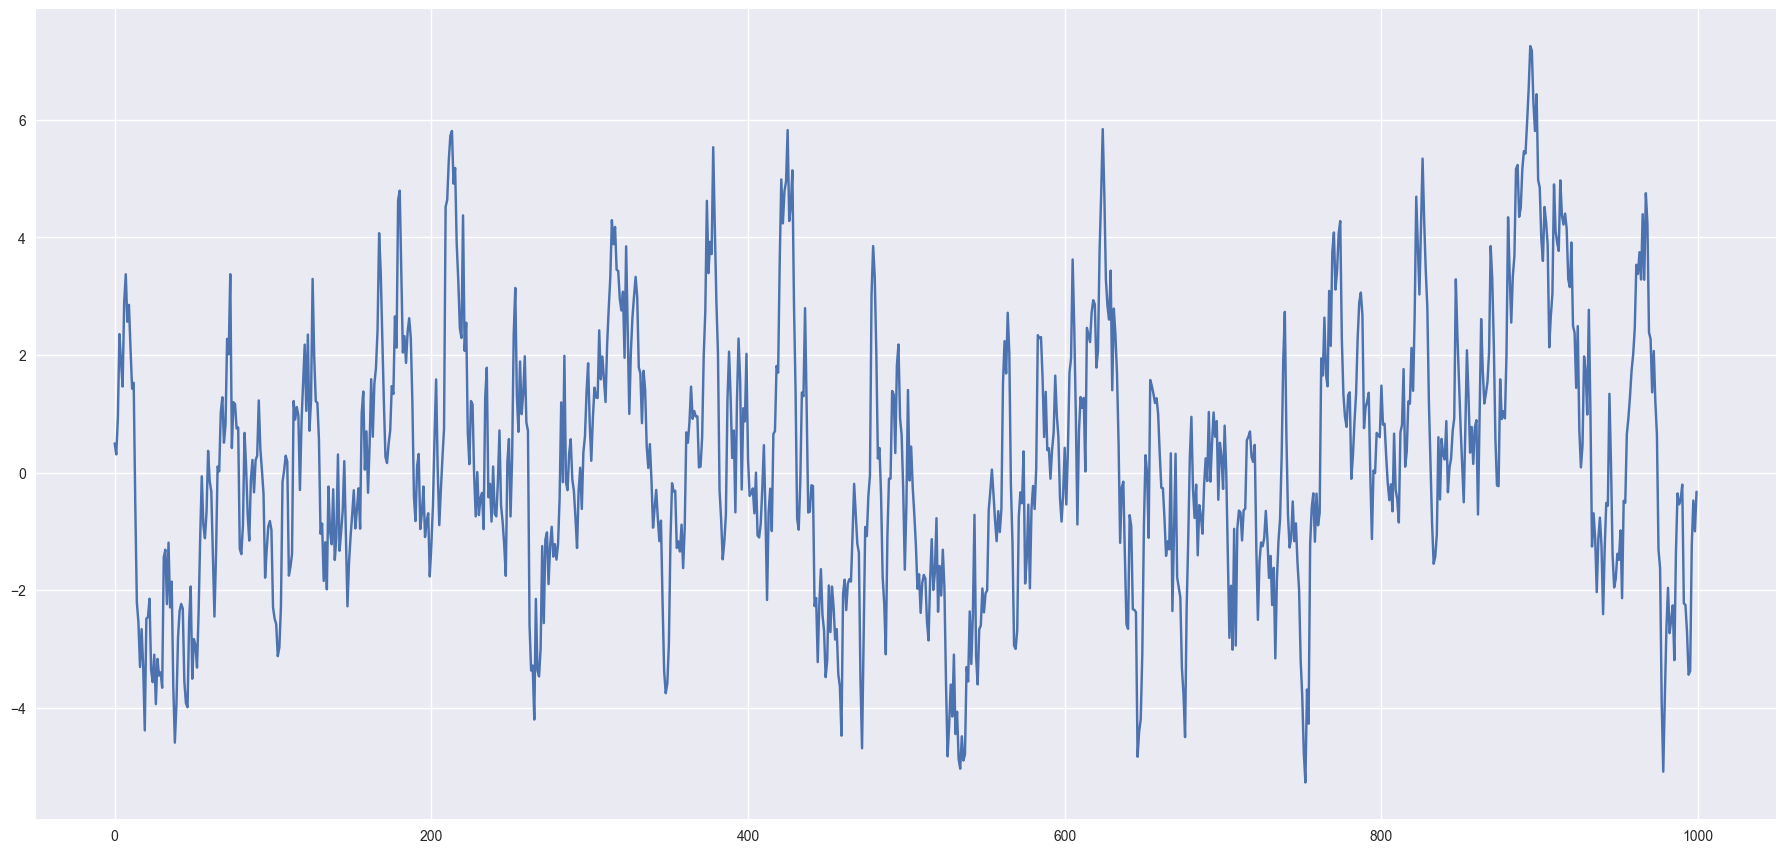

In [58]:
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plt.show()

TODO

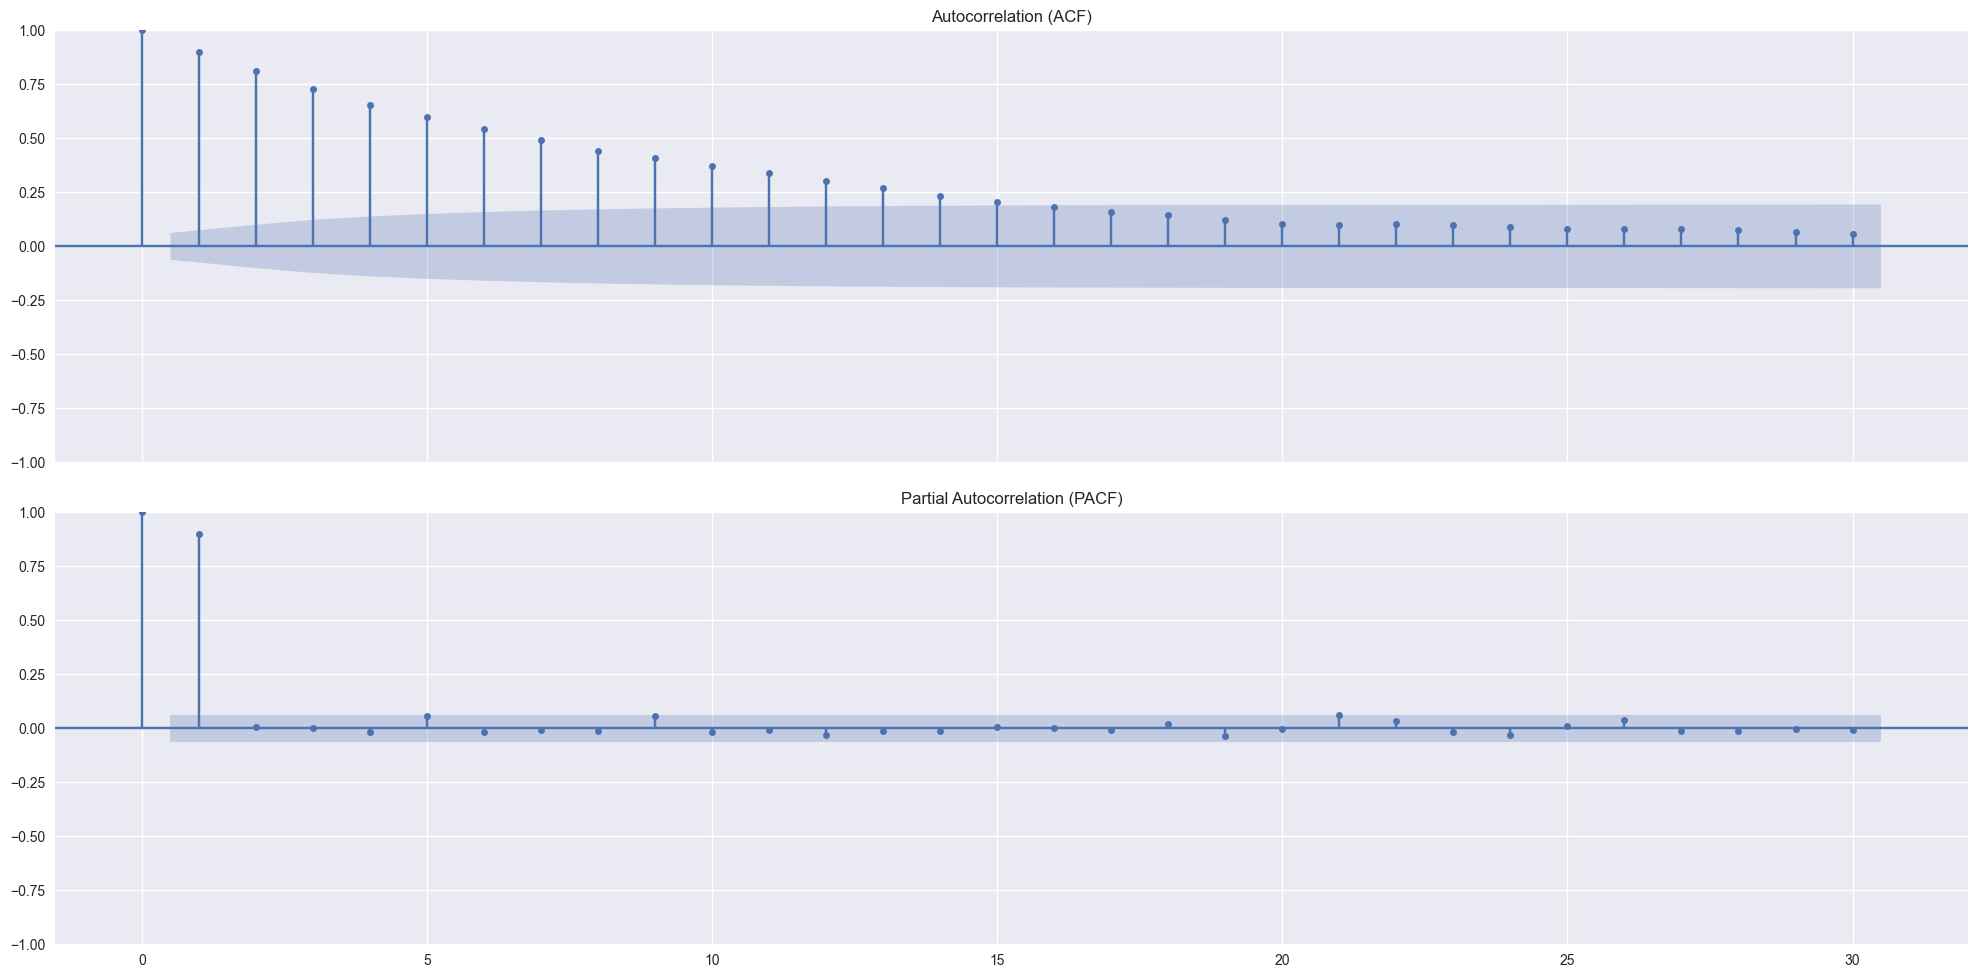

In [111]:
plot_acf_pacf(simulated_data_1, lags=30)

TODO

## MA processes

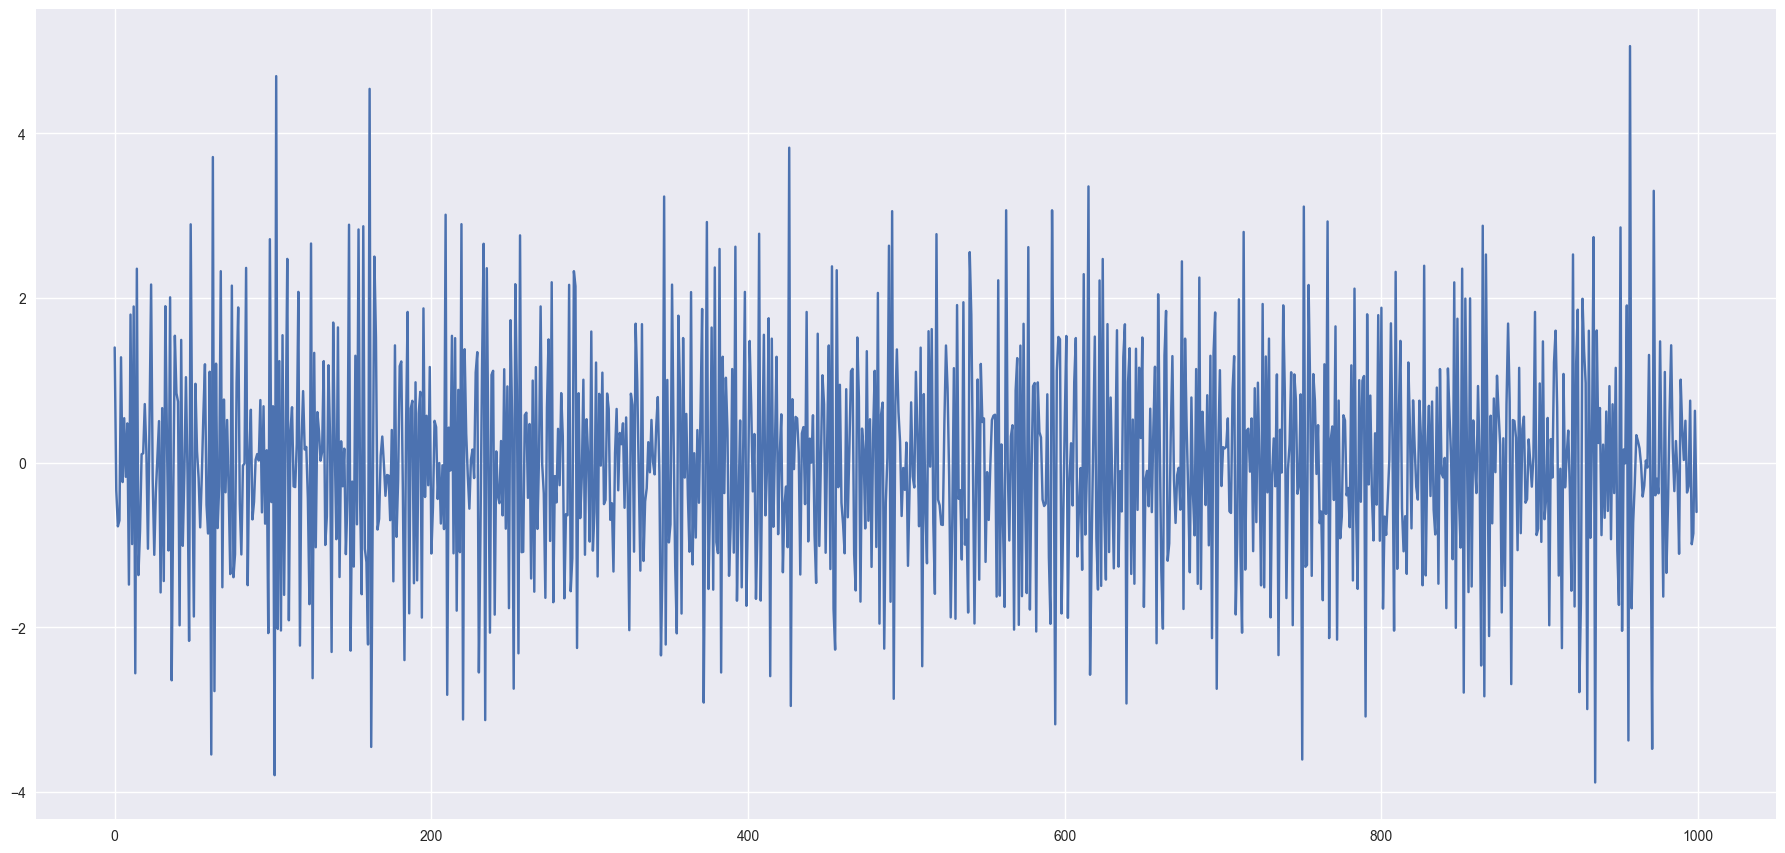

In [61]:
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_2 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

TODO

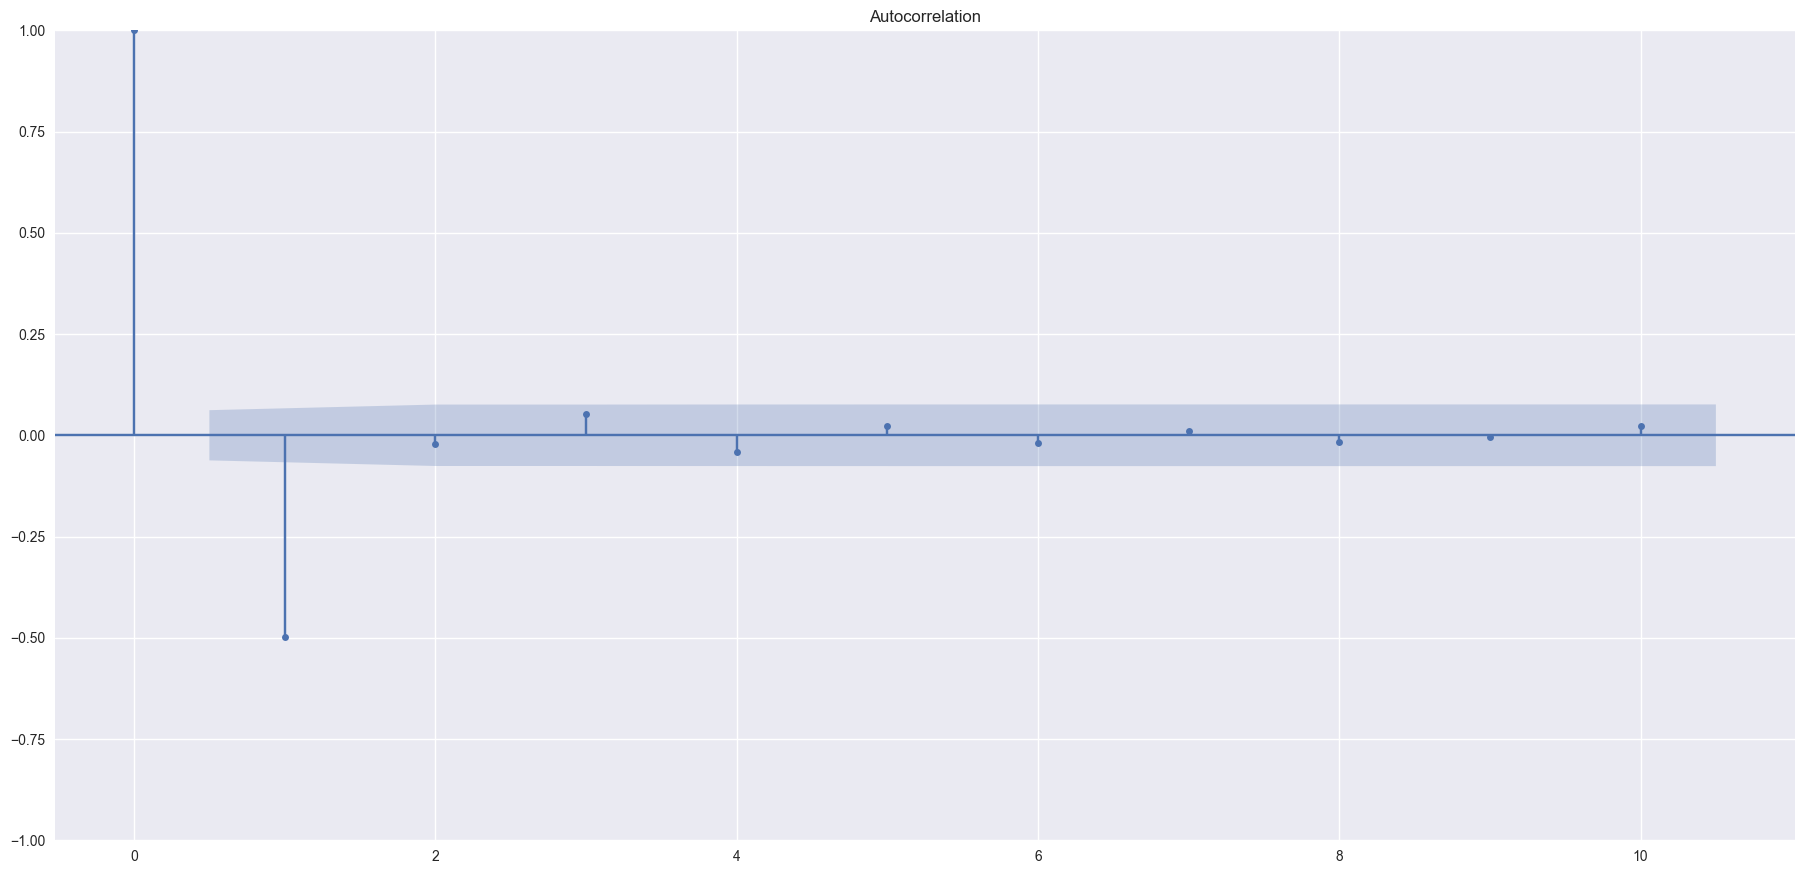

In [62]:
plot_acf(simulated_data_2, lags = 10)
plt.show()

TODO

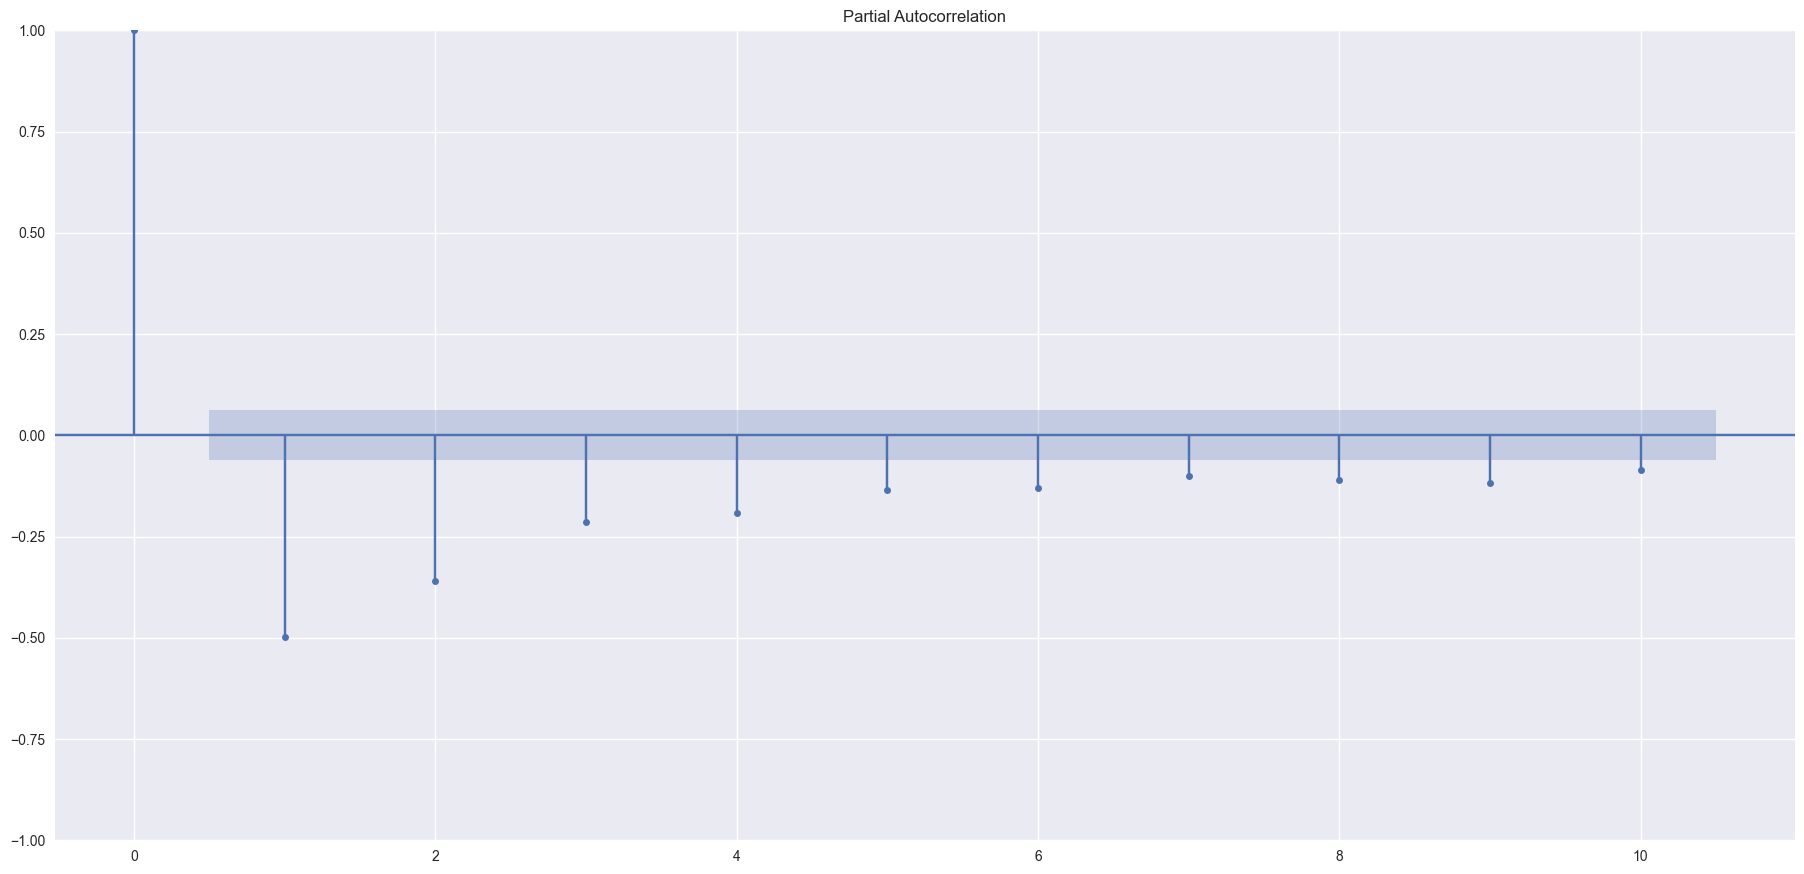

In [63]:
plot_pacf(simulated_data_2, lags = 10)
plt.show()

TODO

## ARMA

<Axes: xlabel='date'>

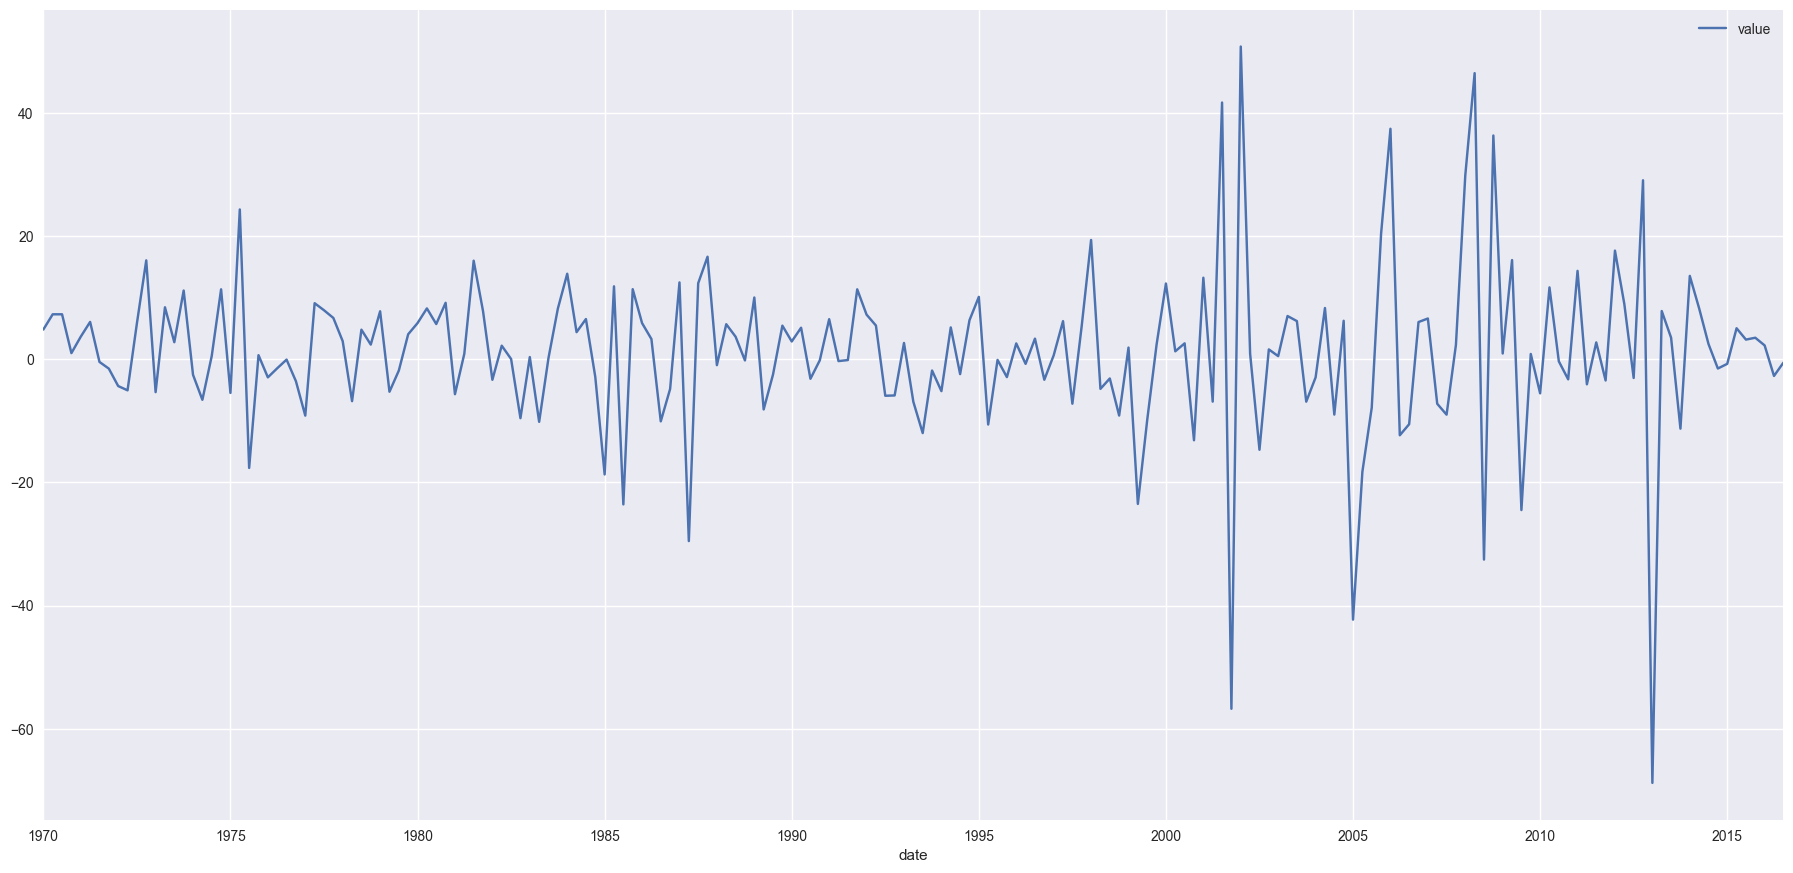

In [64]:
xdat = pd.read_csv(CFG.data_folder + 'savings_change.csv')

xdat.columns = ['date', 'value']
xdat['date'] = pd.to_datetime(xdat['date'])

xdat.set_index('date').plot()

TODO

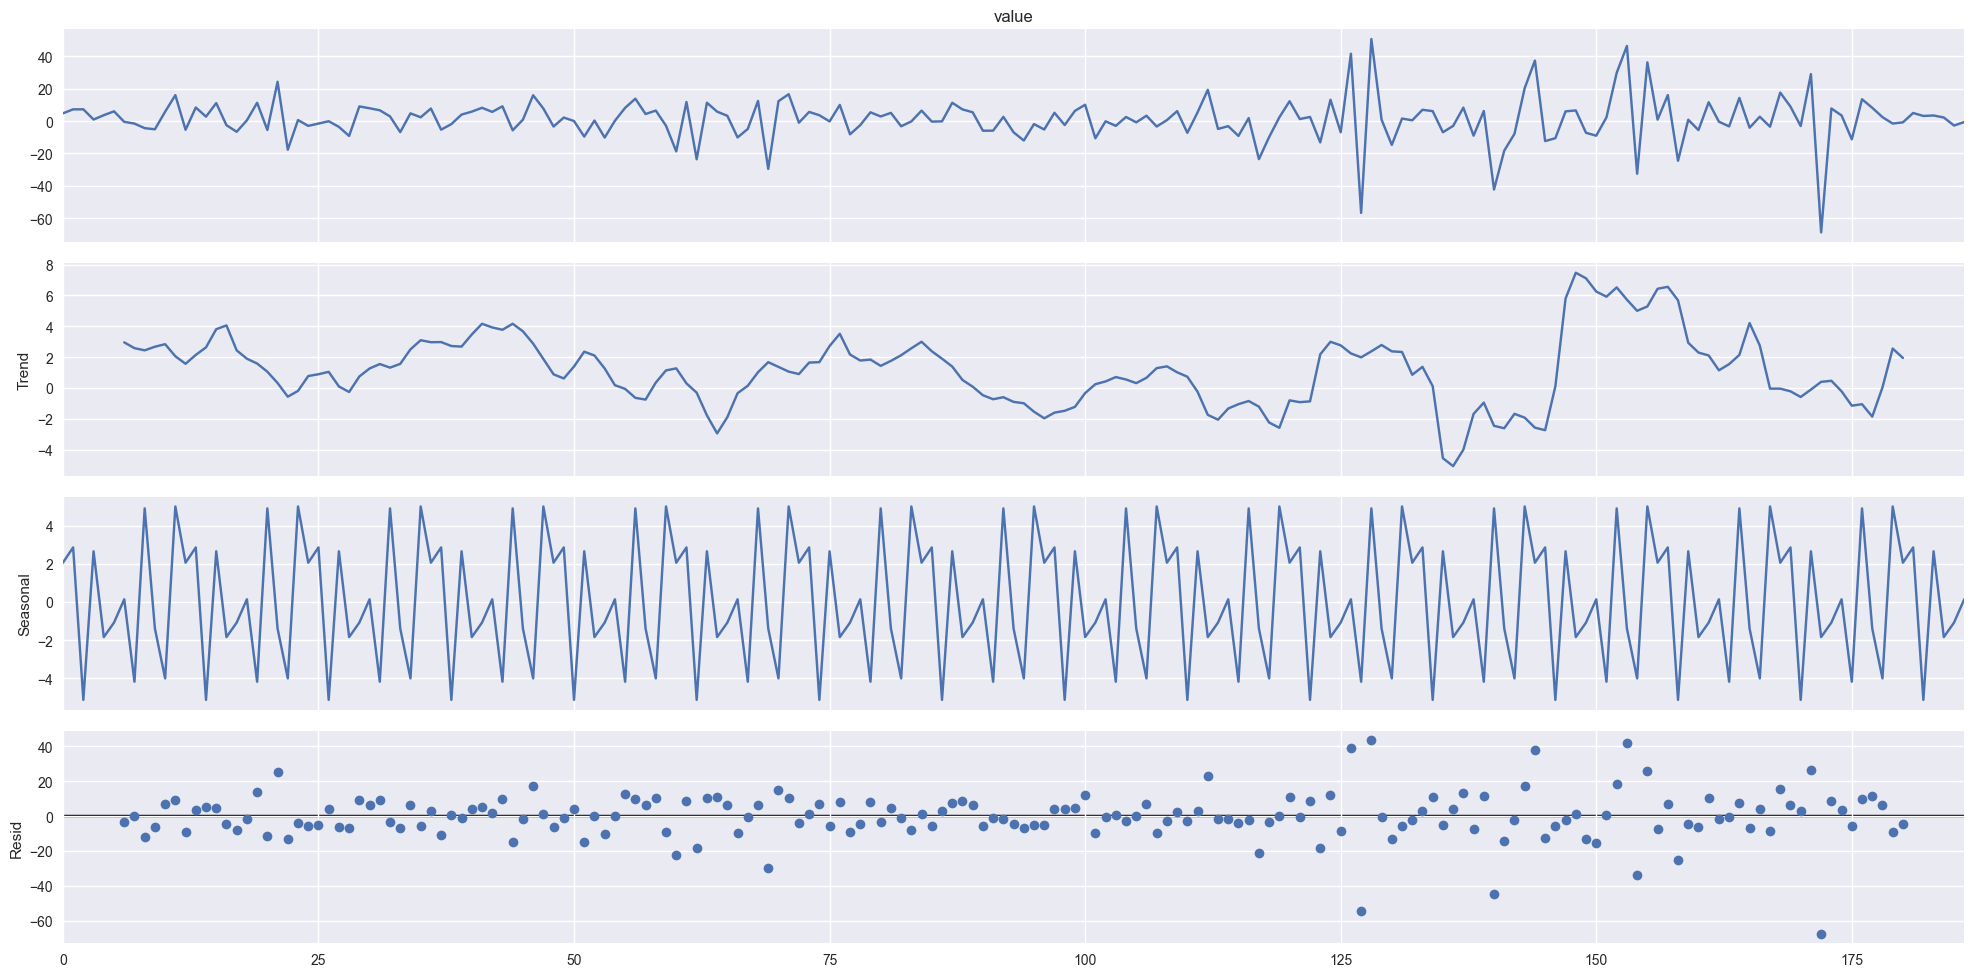

In [65]:
decomposition = sm.tsa.seasonal_decompose(xdat["value"],period =12, model = 'additive') 
figure = decomposition.plot()
plt.show()

TODO

In [66]:
result = adfuller(xdat['value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -18.705760
p-value: 0.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


TODO

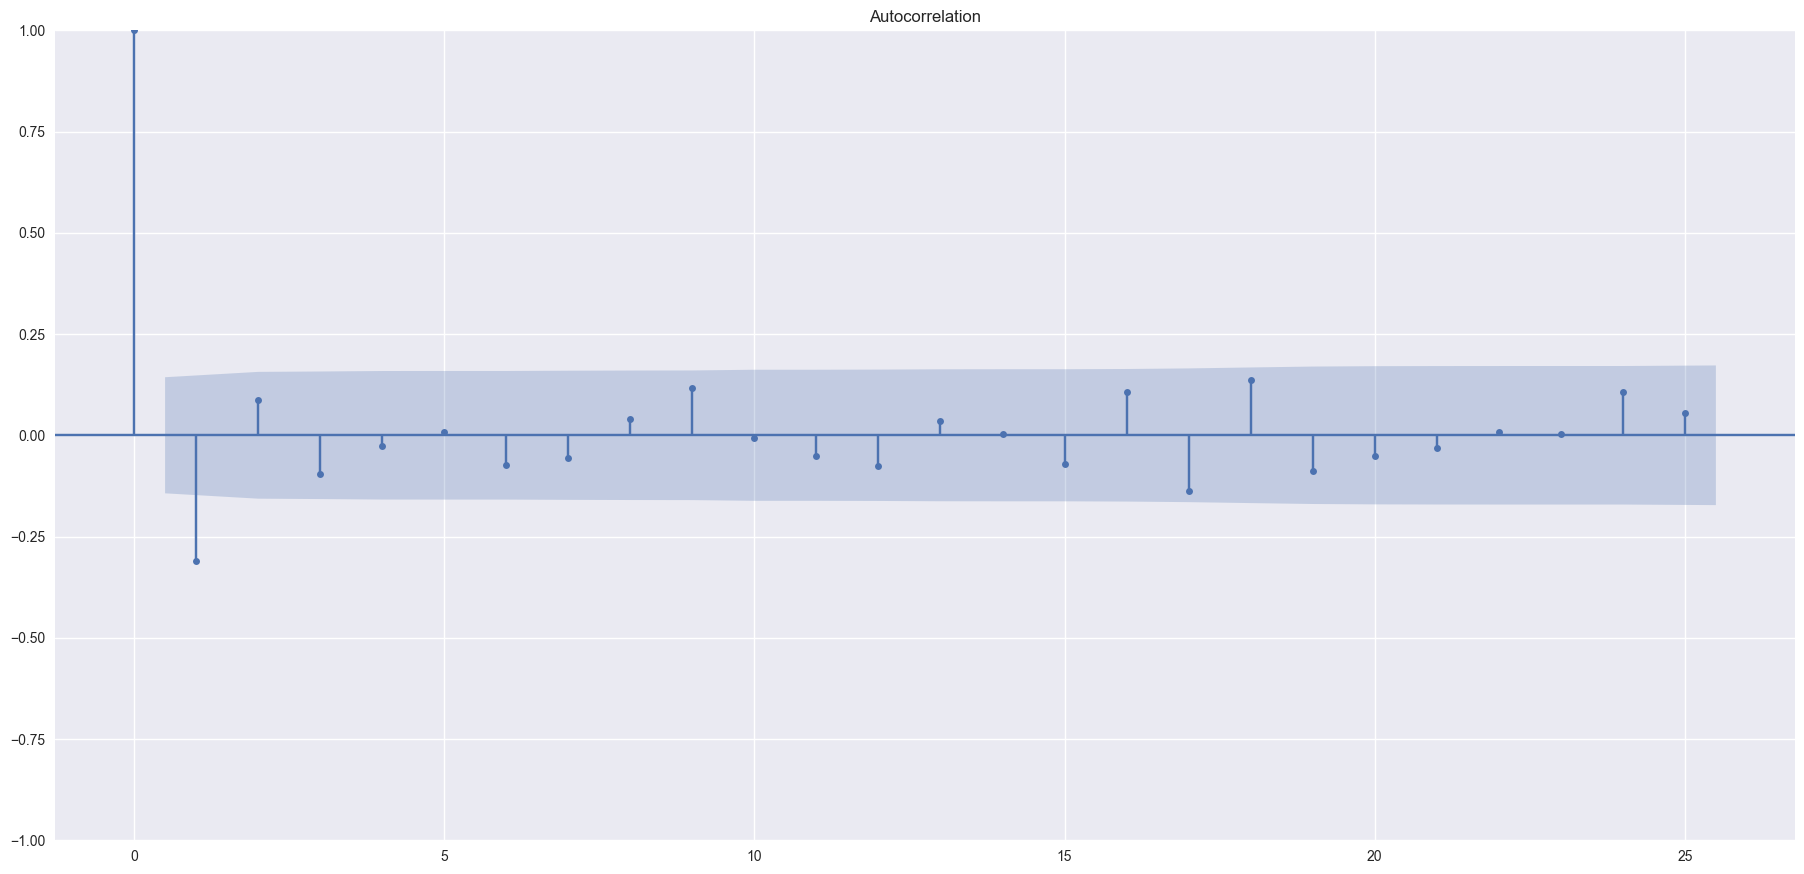

In [67]:
plot_acf(xdat['value'], lags = 25); print()

TODO

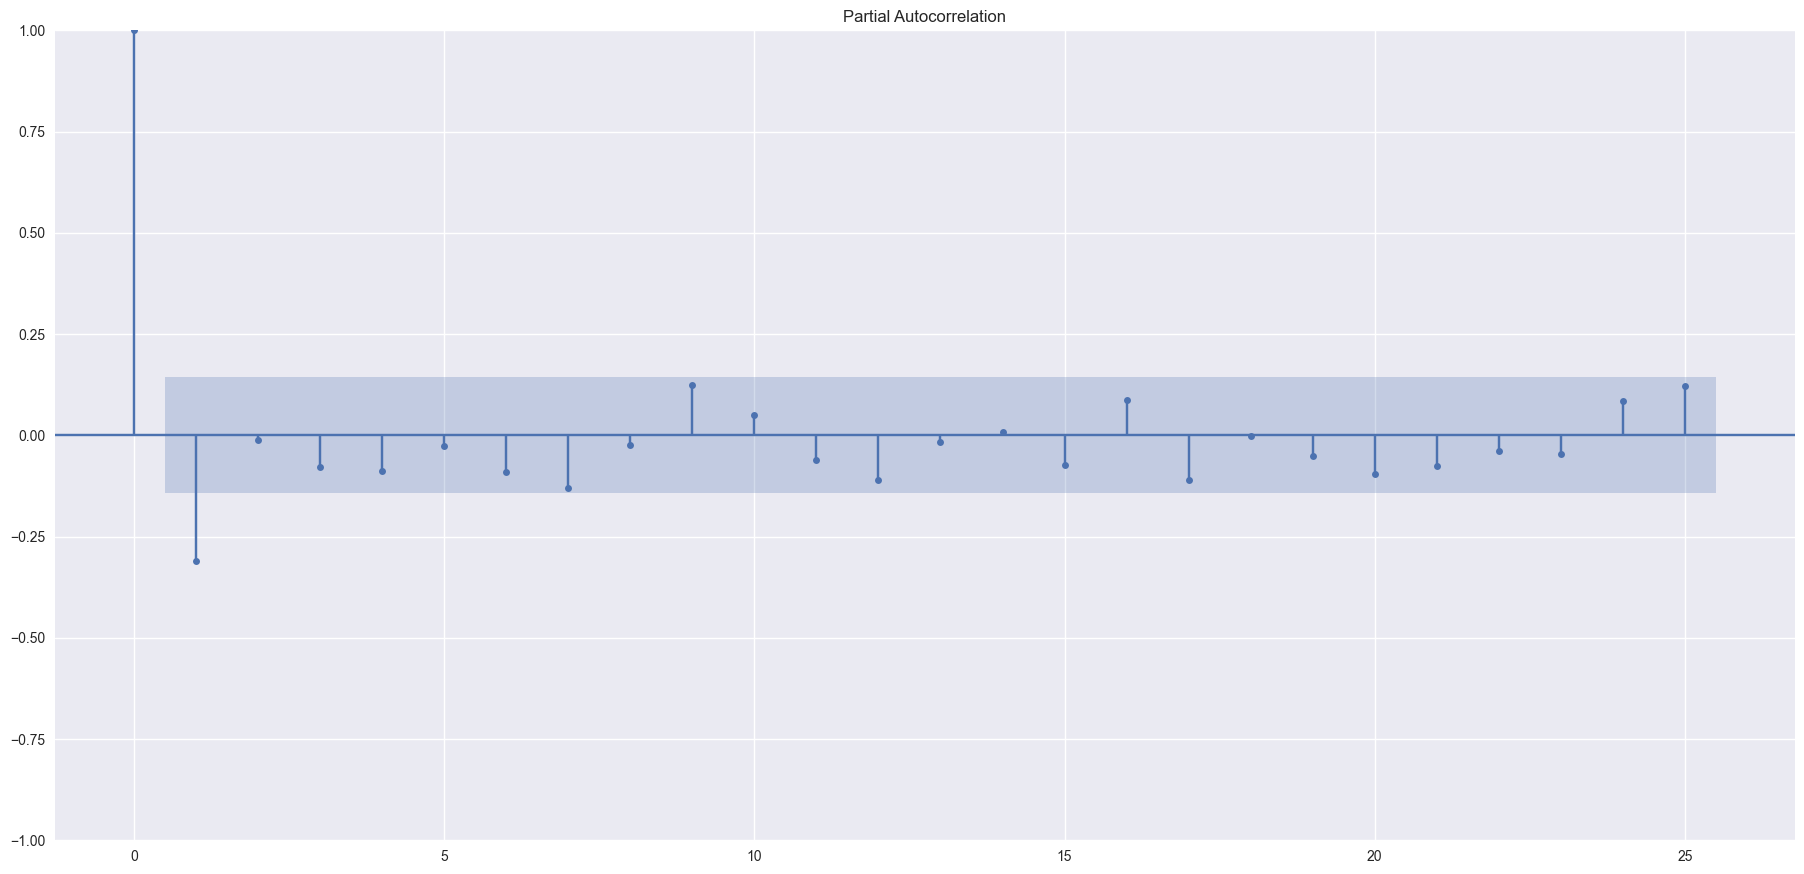

In [68]:
plot_pacf(xdat['value'], lags = 25); print()

TODO

In [69]:
# we split the data into training and validation, leaving out the last 3 years as holdout
xtrain, xvalid = model_selection.train_test_split(xdat['value'], test_size = 12)

TODO

In [70]:
# construct a pipeline, combining feature preprocessing and the model to fit
pipe = pipeline.Pipeline([
    ("fourier", ppc.FourierFeaturizer(m=4)),
    ("arima", arima.AutoARIMA(stepwise=True, trace=1, error_action="ignore",
                              seasonal=False,  # because we use Fourier
                              suppress_warnings=True))
])

pipe.fit(xtrain)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1417.652, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1428.604, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1413.626, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1414.732, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1415.564, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1415.511, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1417.401, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1413.240, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1429.318, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1415.233, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1415.223, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1413.866, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1417.096, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.264 seconds


,steps,"[('fourier', ...), ('arima', ...)]"


TODO

In [71]:
# we can inspect the results
pipe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  175
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -699.620
Date:                Tue, 13 Jan 2026   AIC                           1413.240
Time:                        01:05:41   BIC                           1435.394
Sample:                             0   HQIC                          1422.226
                                - 175                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.5503      1.091      1.421      0.155      -0.588       3.689
FOURIER_S4-0     2.2632      1.465      1.545      0.122      -0.609       5.135
FOURIER_C4-0     0.6652      1.497      0.444      0.657      -2.268       3.599
FOURIER_S4-1  9.682e+04   3.97e+05      0.244      0.808   -6.82e+05    8.76e+05
FOURIER_C4-1    -0.0559      4.481     -0.012      0.990      -8.839       8.727
ar.L1           -0.3125      0.043     -7.312      0.000      -0.396      -0.229
sigma2         173.6642     11.068     15.691      0.000     151.972     195.357
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               206.40
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.35   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

TODO

In [72]:
# we compute predictions from the pipeline object
preds, conf_int = pipe.predict(n_periods= xvalid.shape[0], return_conf_int=True)
print("\nForecasts:")
print(preds)



Forecasts:
175    1.404690
176    2.588137
177    1.783539
178   -2.484031
179    3.296285
180    1.973680
181    1.998851
182   -2.574599
183    3.347867
184    1.934282
185    2.034440
186   -2.608998
dtype: float64


In [73]:
preds.values

array([ 1.40469031,  2.5881369 ,  1.78353876, -2.48403118,  3.29628497,
        1.97367988,  1.99885119, -2.5745993 ,  3.34786714,  1.93428244,
        2.03444011, -2.60899838])

TODO

In [74]:
print("\nConfidence intervals:")
print(conf_int)


Confidence intervals:
[[-24.42405252  27.23343314]
 [-24.4726354   29.6489092 ]
 [-25.39457839  28.96165591]
 [-29.67358286  24.70552049]
 [-23.89438332  30.48695326]
 [-25.21709747  29.16445723]
 [-25.19193681  29.1896392 ]
 [-29.76538834  24.61618974]
 [-23.84292201  30.53865628]
 [-25.25650671  29.1250716 ]
 [-25.15634904  29.22522927]
 [-29.79978753  24.58179078]]


TODO

In [75]:
xvalid

175   -11.276615
176    13.520202
177     8.244048
178     2.461953
179    -1.513050
180    -0.758400
181     5.023918
182     3.180930
183     3.482786
184     2.236534
185    -2.721501
186    -0.572858
Name: value, dtype: float64

<Axes: >

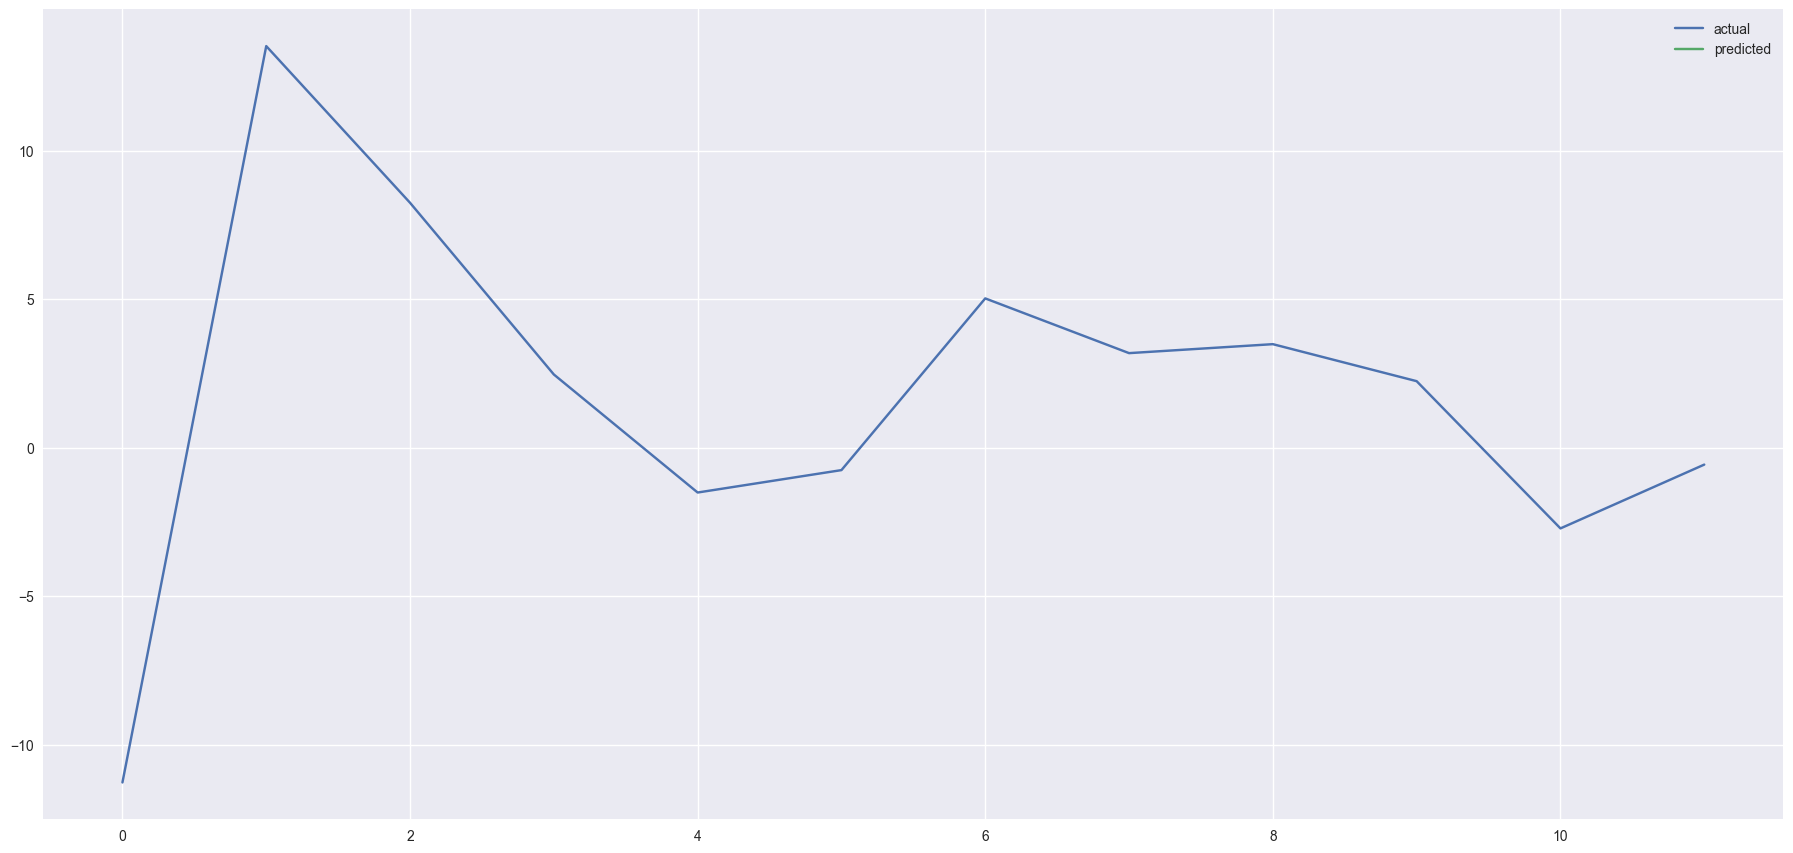

In [76]:
# let's quickly visualize the forecast
xvalid = pd.DataFrame(xvalid.values, columns = ['actual'])
xvalid['predicted'] = preds
xvalid.plot()

TODO

# Beyond ARMA

## ARIMA

<Axes: xlabel='date'>

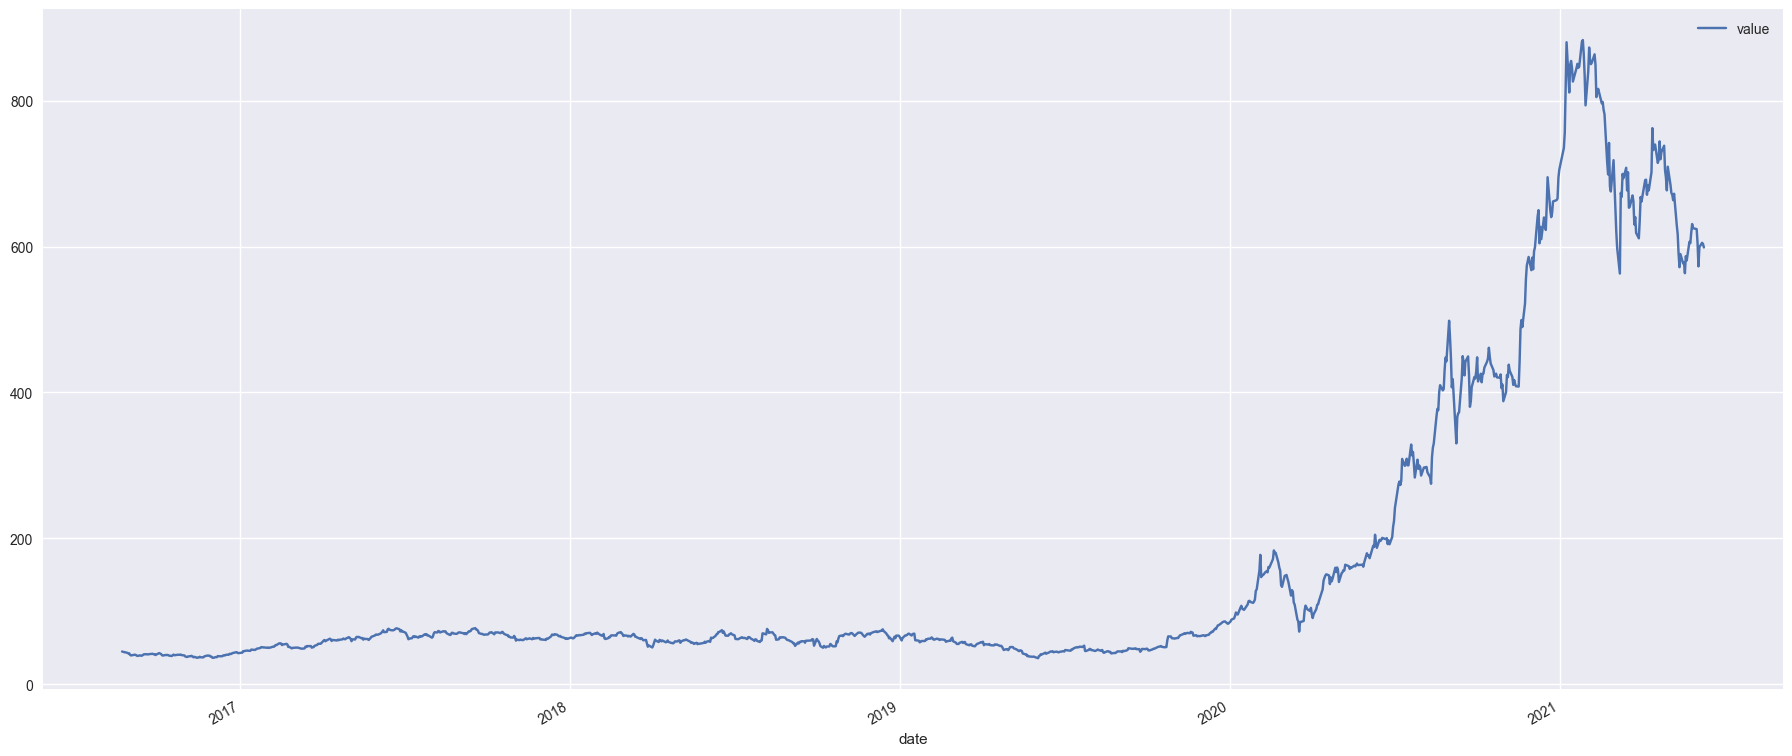

In [77]:
# quick demo: Tesla daily closing price on NYSE 
xdat = pd.read_csv(CFG.data_folder + 'tesla_prices_5y.csv', usecols = ['Date', 'Close'])
xdat.columns = ['date', 'value']

# xdat['value'] = np.log1p(xdat['value'])
xdat['date'] = pd.to_datetime(xdat['date'])
xdat.set_index('date').plot()

TODO

In [78]:
result = adfuller(xdat['value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.223000
p-value: 0.935724


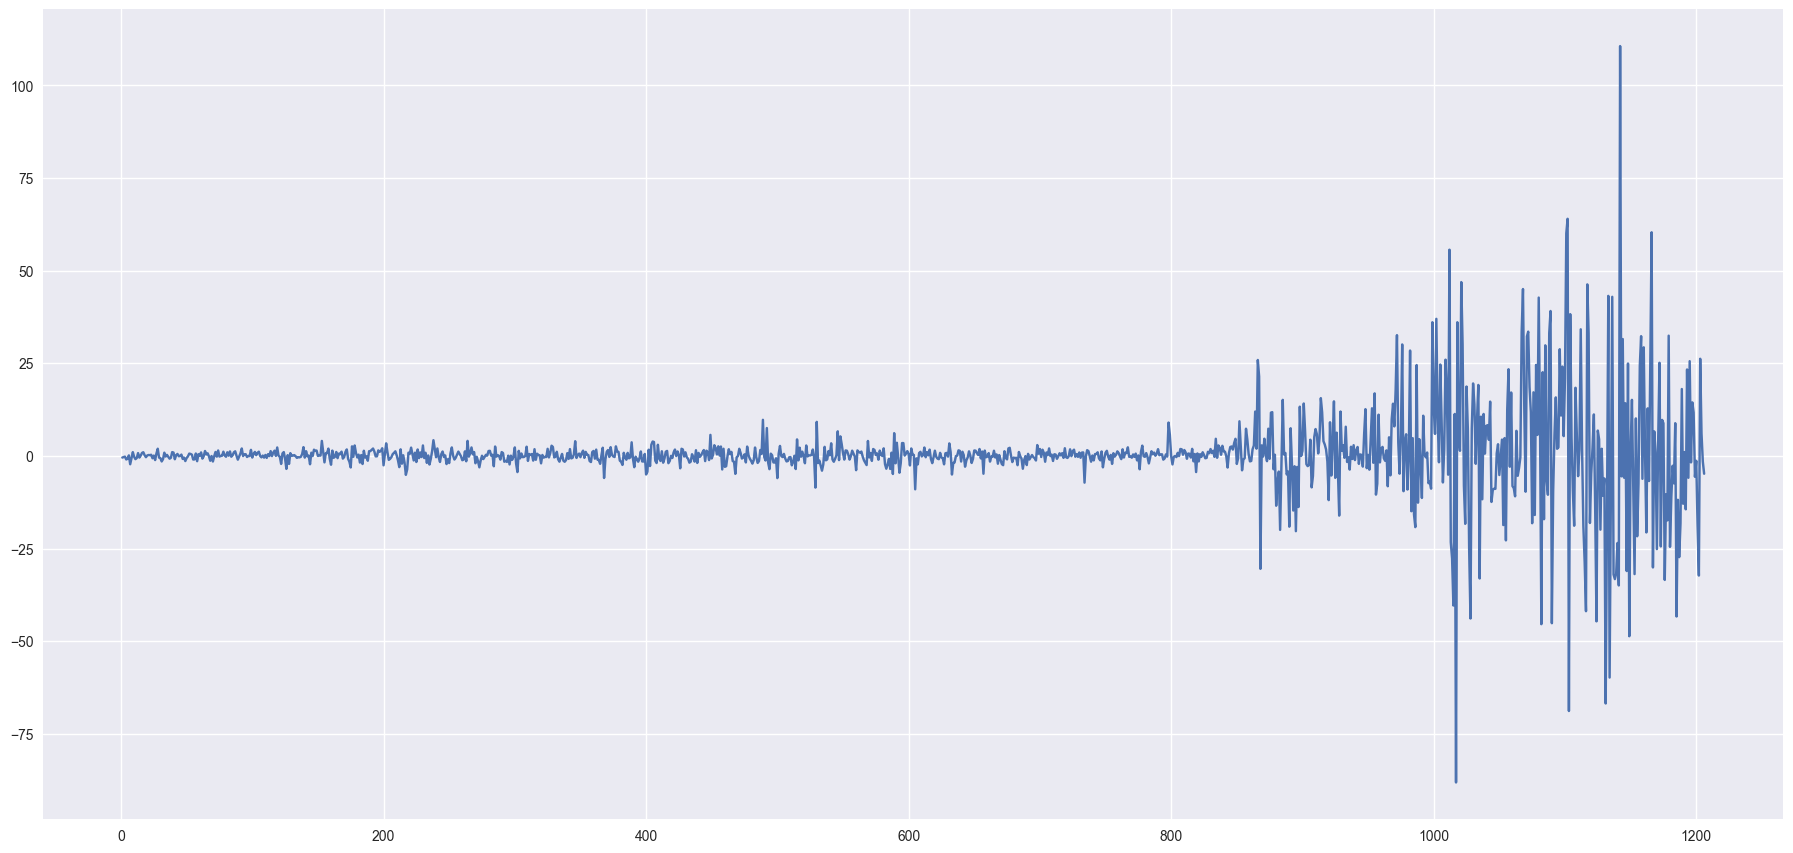

In [79]:
ydat = xdat['value'].diff()
ydat.plot()
print()

TODO

In [80]:
result = adfuller(ydat.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.940299
p-value: 0.000000


## SARIMA


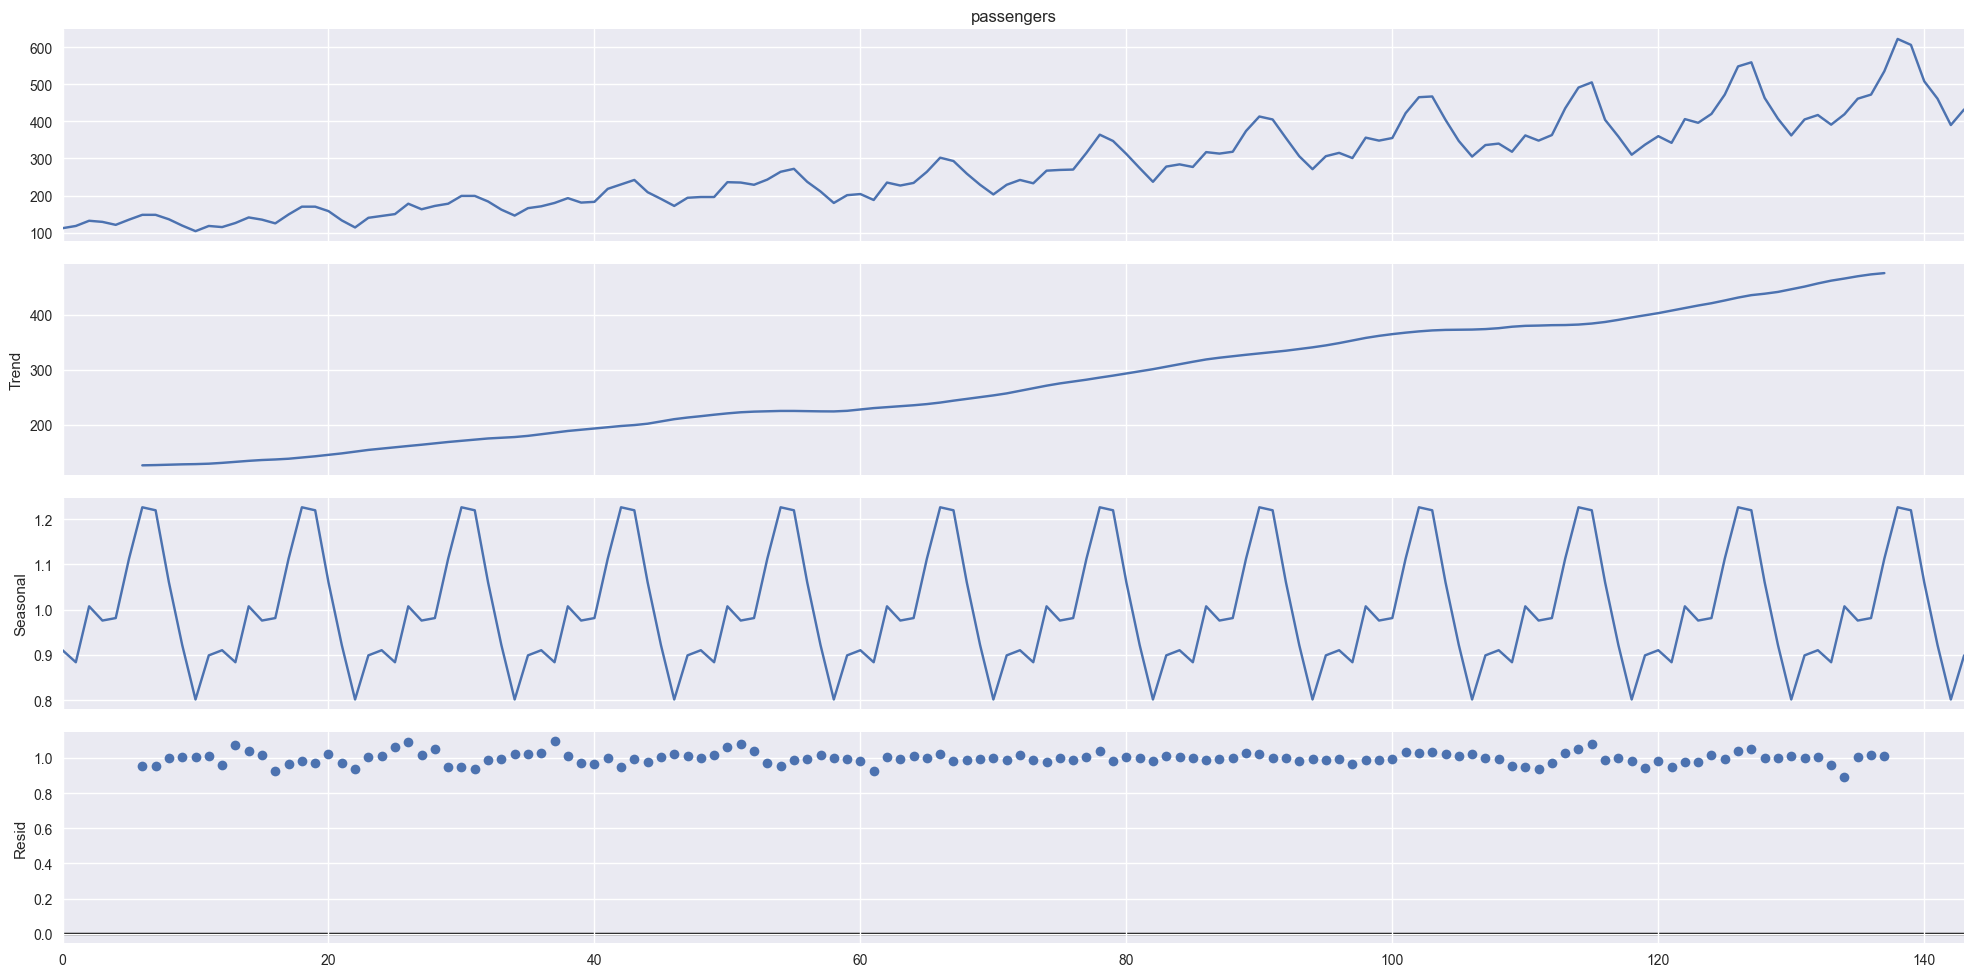

In [81]:
series = pd.read_csv(CFG.data_folder + 'passengers.csv')
series['date'] = pd.to_datetime(series['date'])


decomposition = seasonal_decompose(series['passengers'], period = 12, model = 'multiplicative')
figure = decomposition.plot()
plt.show()

In [82]:
# check stationarity
result = adfuller(decomposition.seasonal)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4203766867831889.000000
p-value: 0.000000


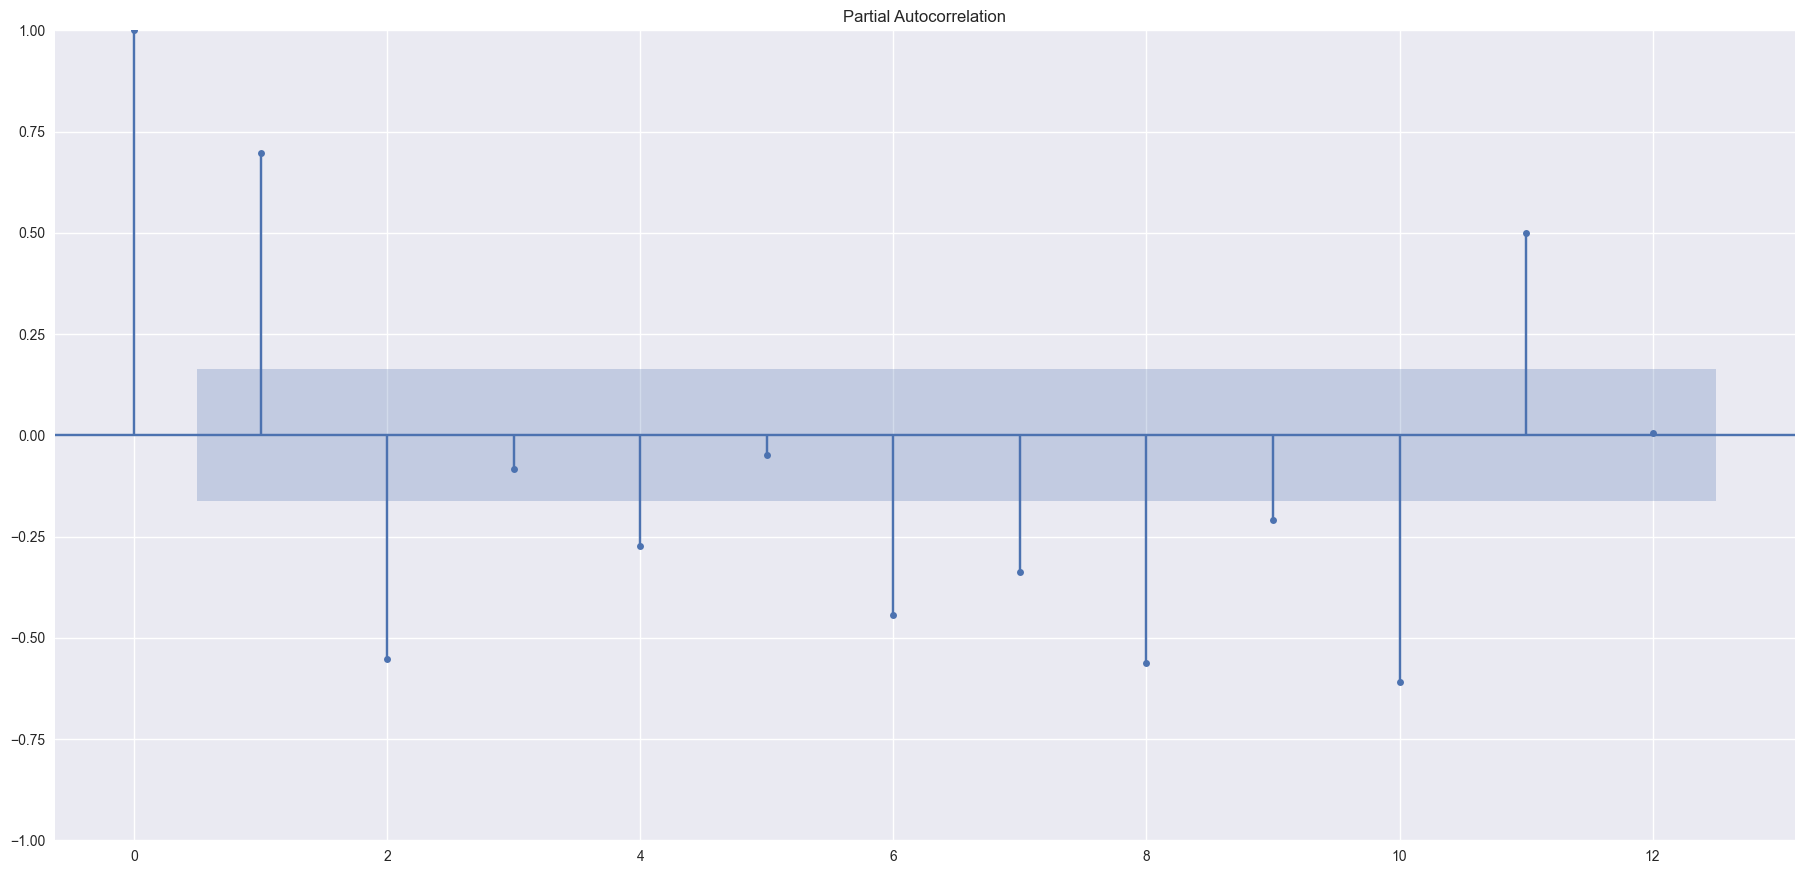

In [83]:
plot_pacf(decomposition.seasonal, lags = 12); print()

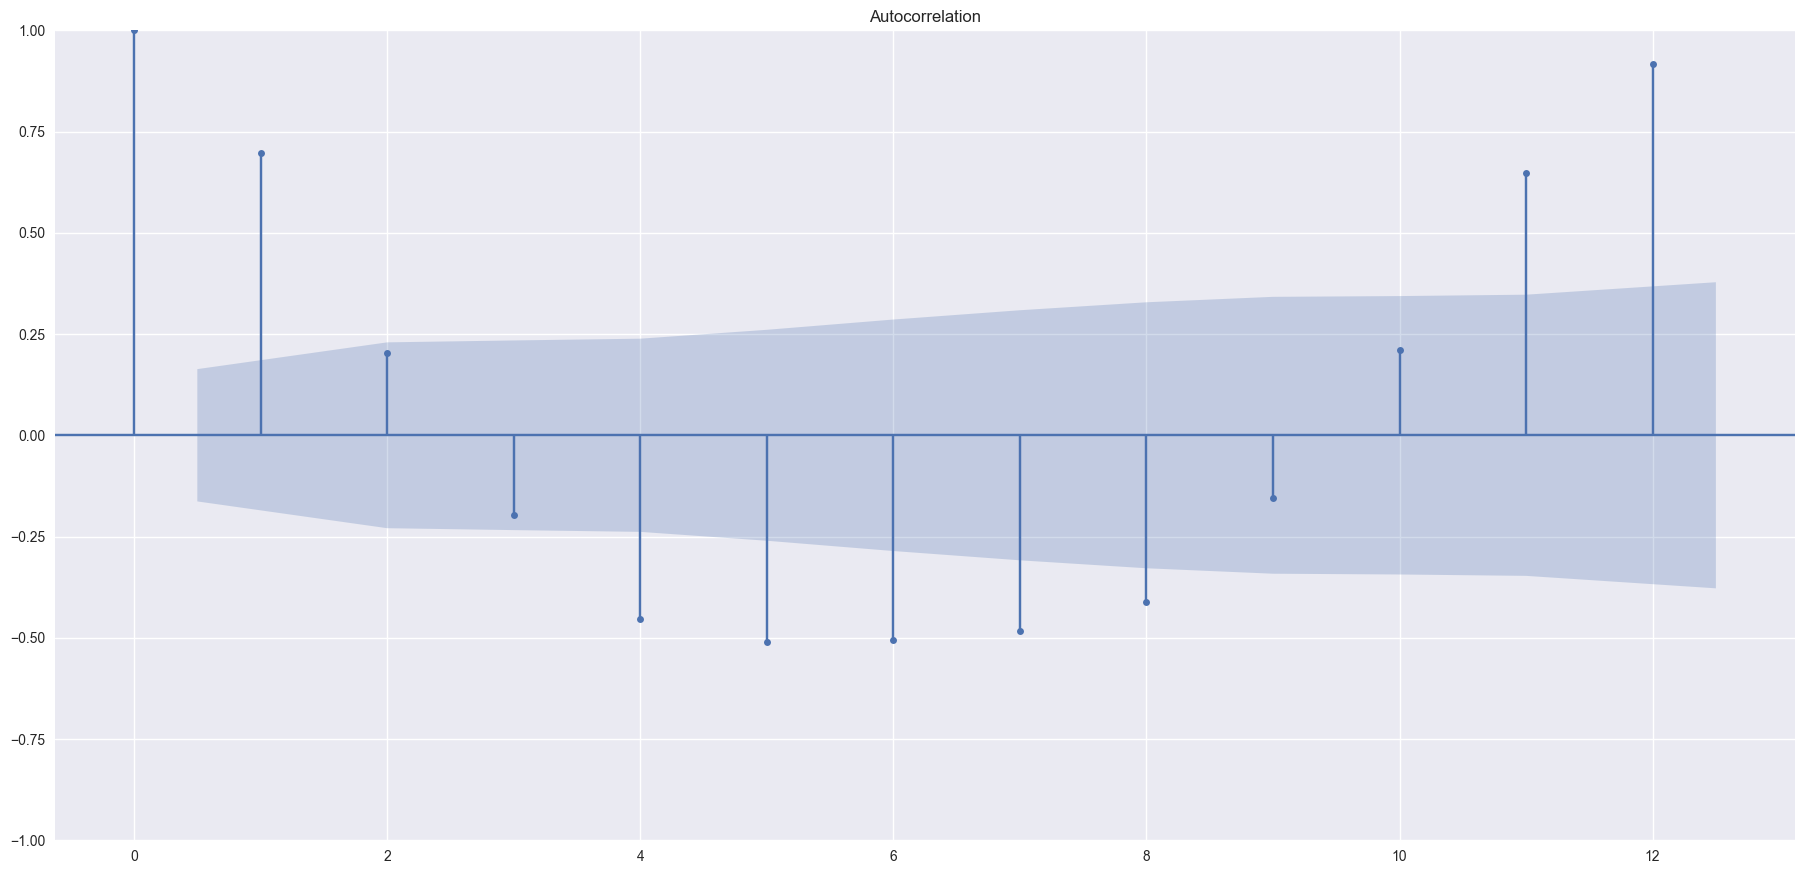

In [84]:
plot_acf(decomposition.seasonal, lags = 12); print()

## SARIMAX

In [87]:
# TODO

TODO

# Building a model

In [89]:
# load the data
train = pd.read_csv(CFG.data_folder + 'train.csv' ,parse_dates=['date'],index_col='date')
test = pd.read_csv(CFG.data_folder + 'test.csv', parse_dates=['date'],index_col='date')
df = pd.concat([train,test],sort=True)

TODO

In [90]:
# we subset to one item x store combination
buf = df[(df.item==1)&(df.store==1)].copy()
buf.head(10)

,id,item,sales,store
date,,,,
2013-01-01,NaN,1,13.0,1
2013-01-02,NaN,1,11.0,1
2013-01-03,NaN,1,14.0,1
2013-01-04,NaN,1,13.0,1
2013-01-05,NaN,1,10.0,1
2013-01-06,NaN,1,12.0,1
2013-01-07,NaN,1,10.0,1
2013-01-08,NaN,1,9.0,1
2013-01-09,NaN,1,12.0,1


TODO

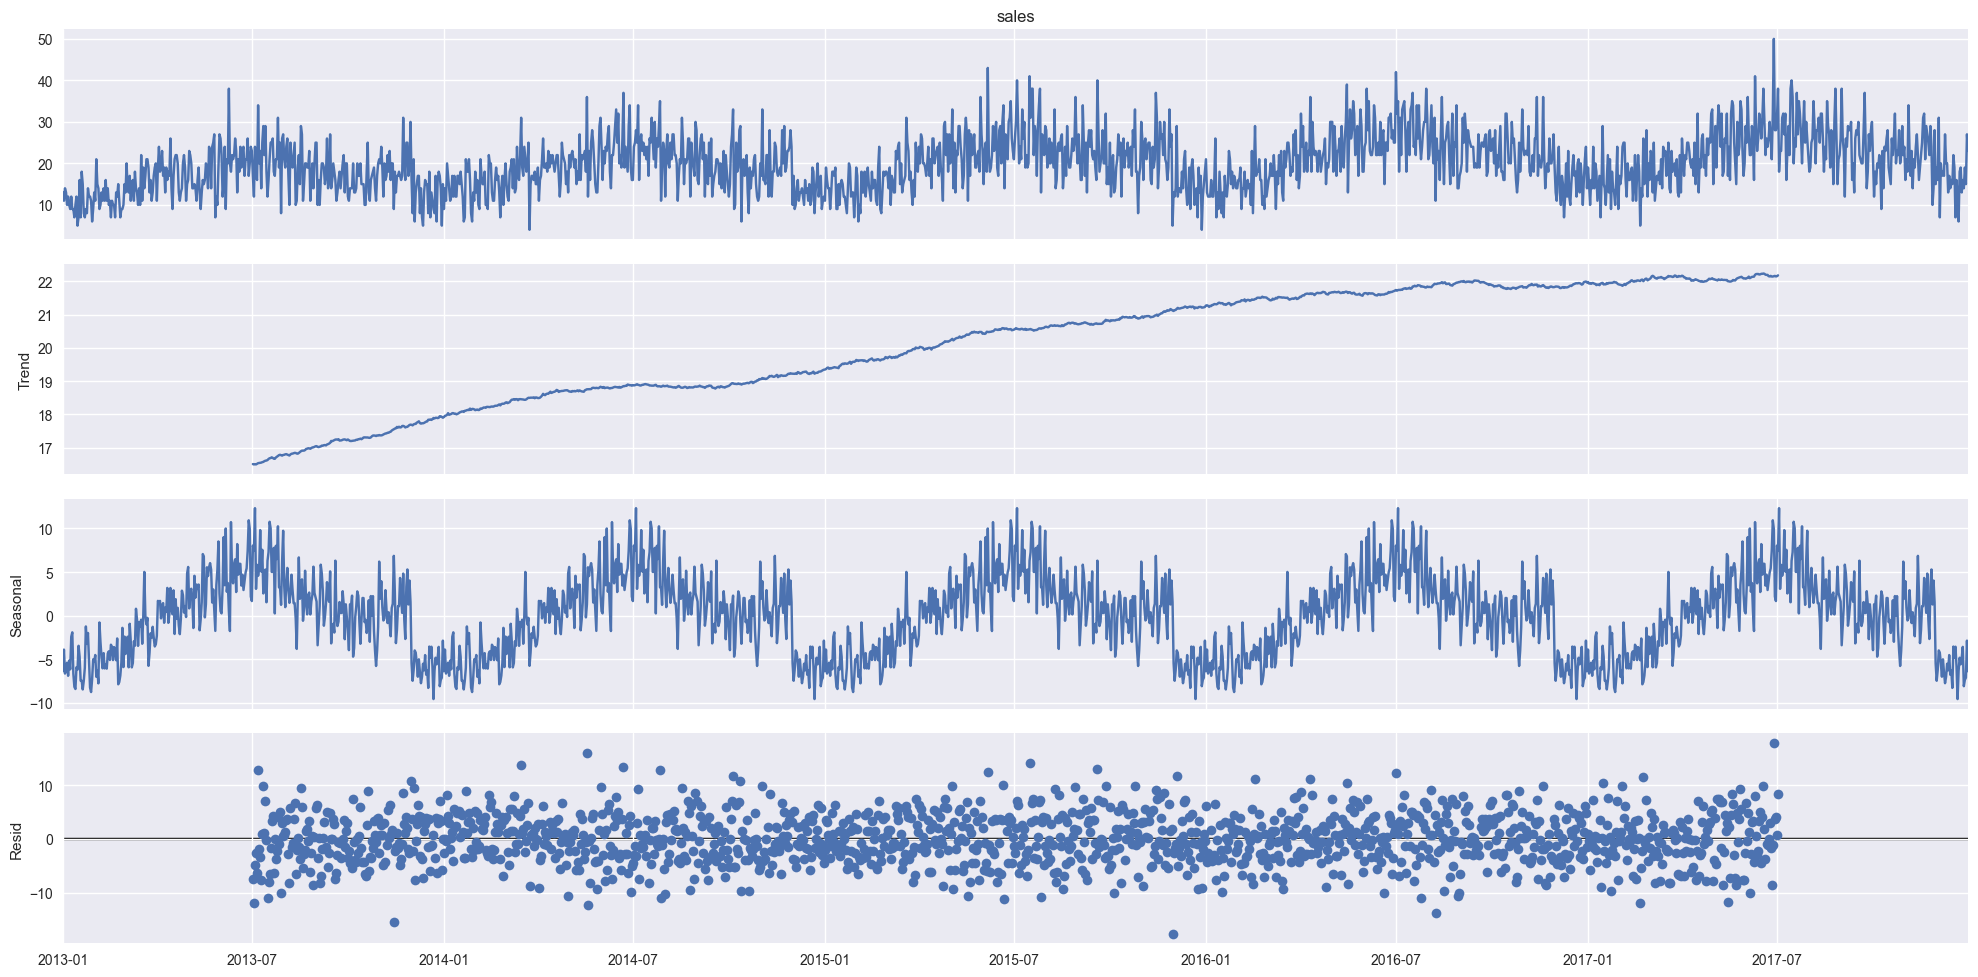

In [92]:
# what do the components look like? 
decomposition = seasonal_decompose(buf.sales.dropna(),period =365)
figure = decomposition.plot()
plt.show()

TODO

In [93]:
tr_start,tr_end = '2014-01-01','2017-09-30'
te_start,te_end = '2017-10-01','2017-12-31'
x0 = buf['sales'][tr_start:tr_end].dropna()
x1 = buf['sales'][te_start:te_end].dropna()

TODO

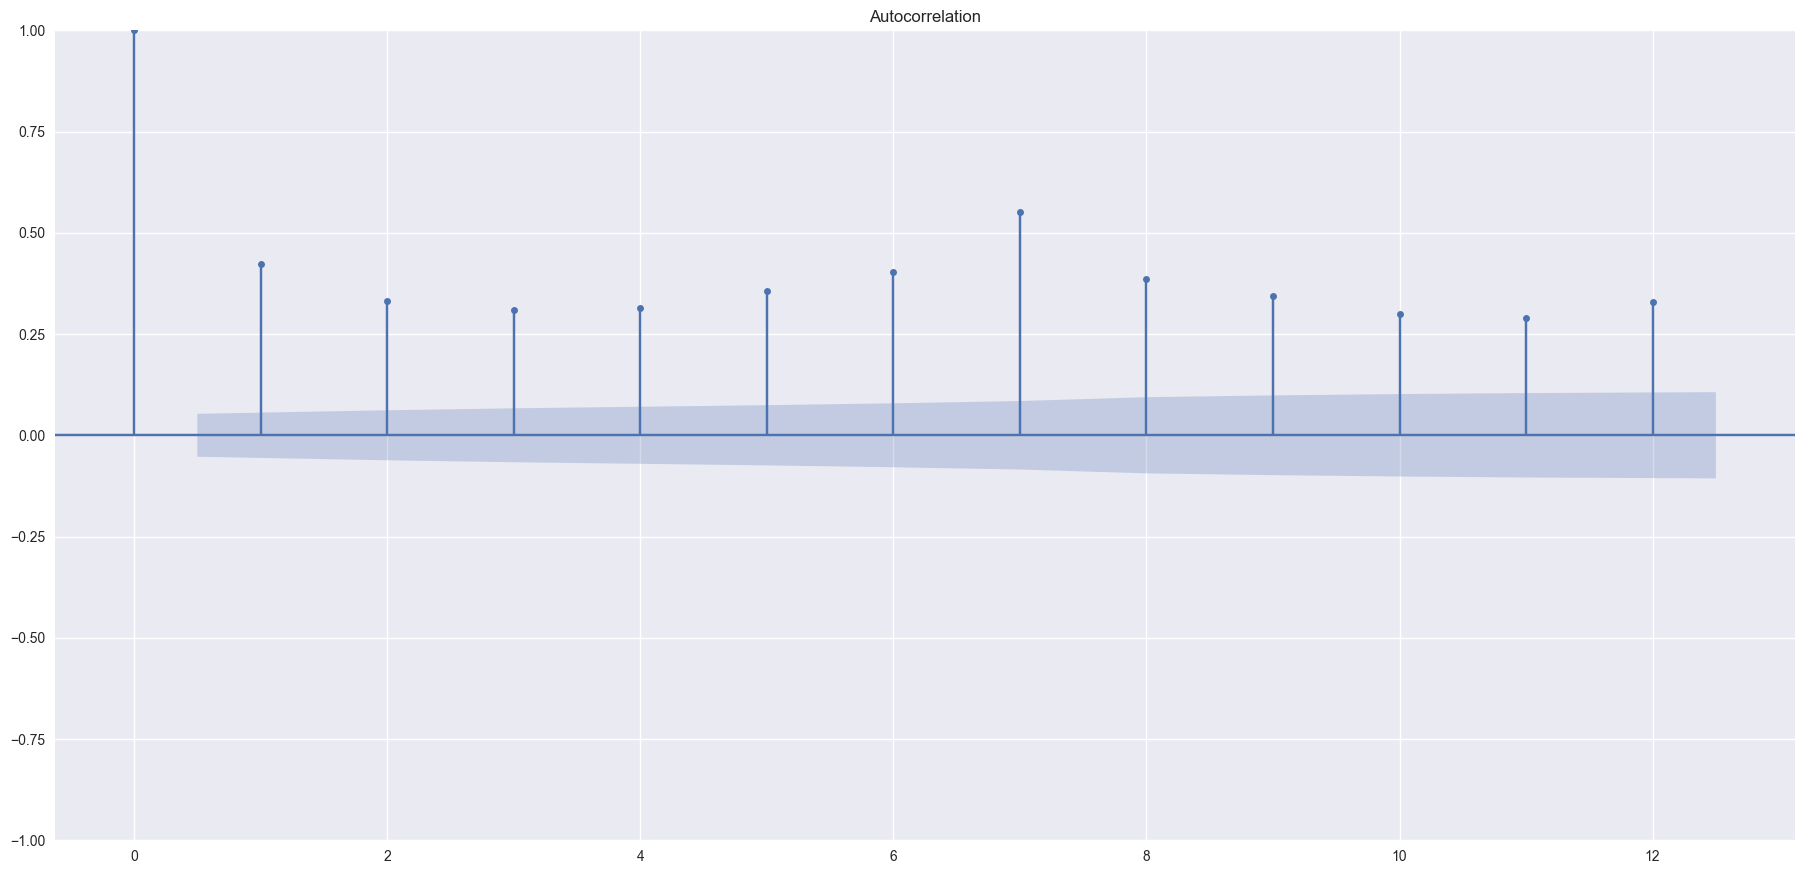

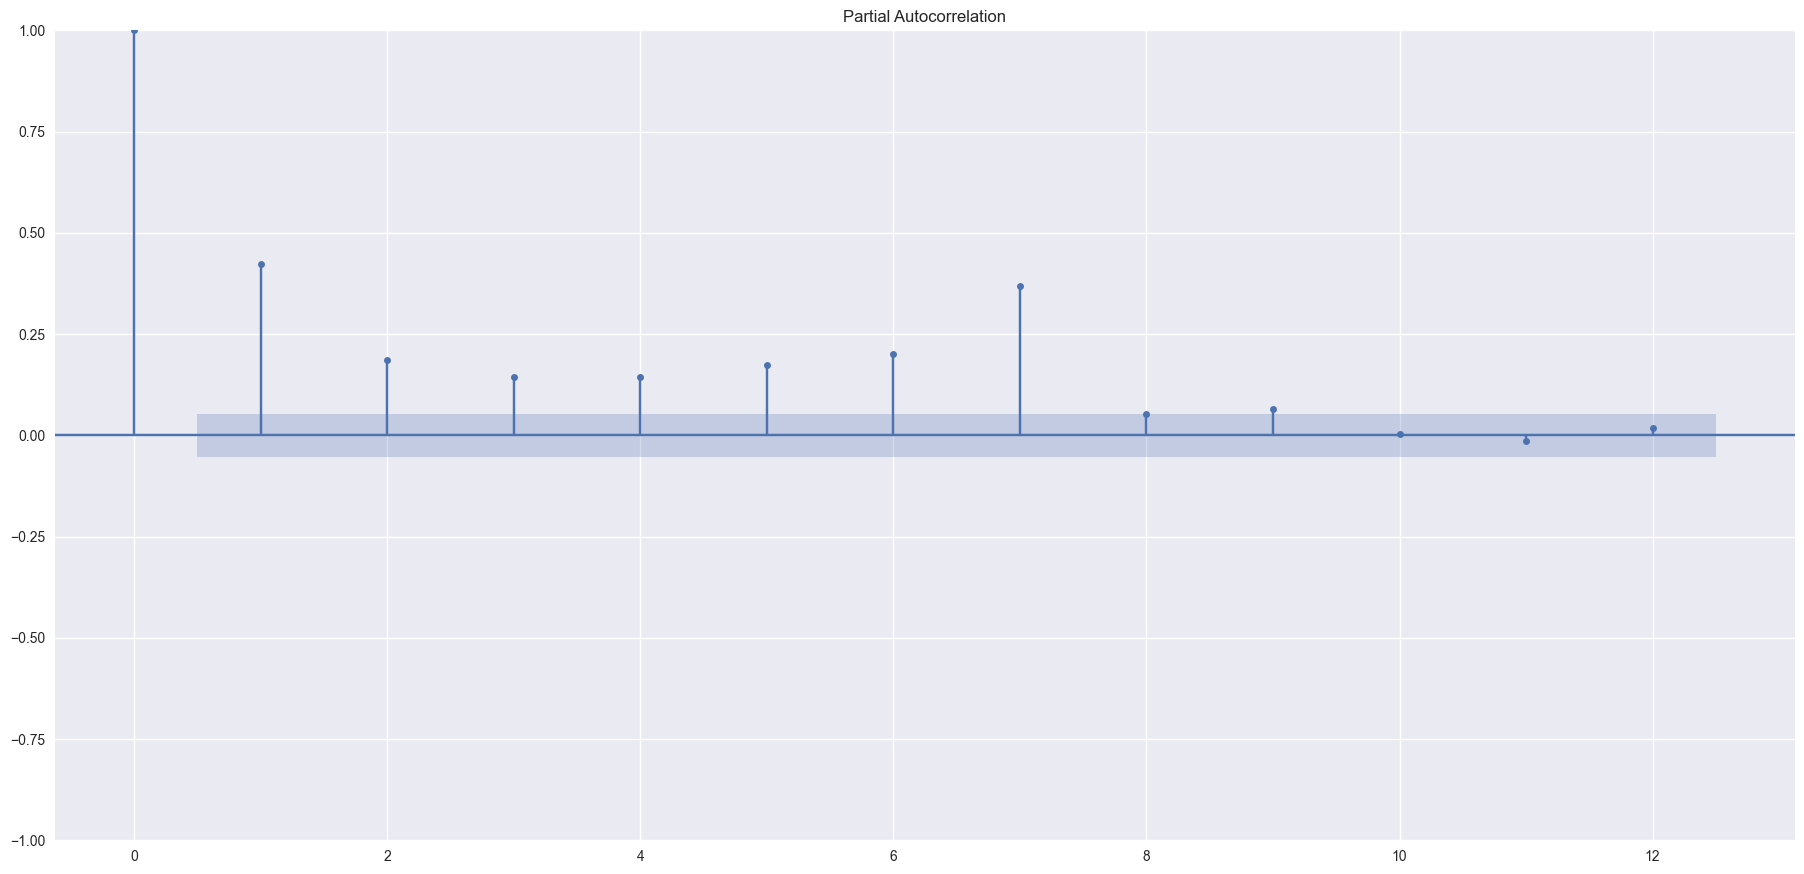

In [ ]:
# examine autocorrelation
plot_acf(x0, lags = 12); print()


In [95]:
model_autoARIMA = auto_arima(x0, start_p=7, start_q=7 ,
                      test='adf',       
                      max_p= 7, max_q=7, 
                      m= 7,              
                      d= 1,
                      seasonal=True,   
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(6,1,6)(1,1,1)[7]             : AIC=inf, Time=4.16 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=9783.794, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=9076.573, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.46 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=9482.428, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=8942.628, Time=0.15 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=1.03 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=9292.960, Time=0.10 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=8771.023, Time=0.20 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=8902.831, Time=0.10 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=1.43 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=1.00 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=8677.203, Time=0.20 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=8810.188, Time=0.13 s

TODO

In [96]:
print(model_autoARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1369
Model:             SARIMAX(6, 1, 0)x(2, 1, 0, 7)   Log Likelihood               -4277.811
Date:                           Tue, 13 Jan 2026   AIC                           8573.621
Time:                                   11:07:27   BIC                           8620.565
Sample:                               01-01-2014   HQIC                          8591.194
                                    - 09-30-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8487      0.028    -30.292      0.000      -0.904      -0.794
ar.L2         -0.7342      0.036    -20.322

TODO

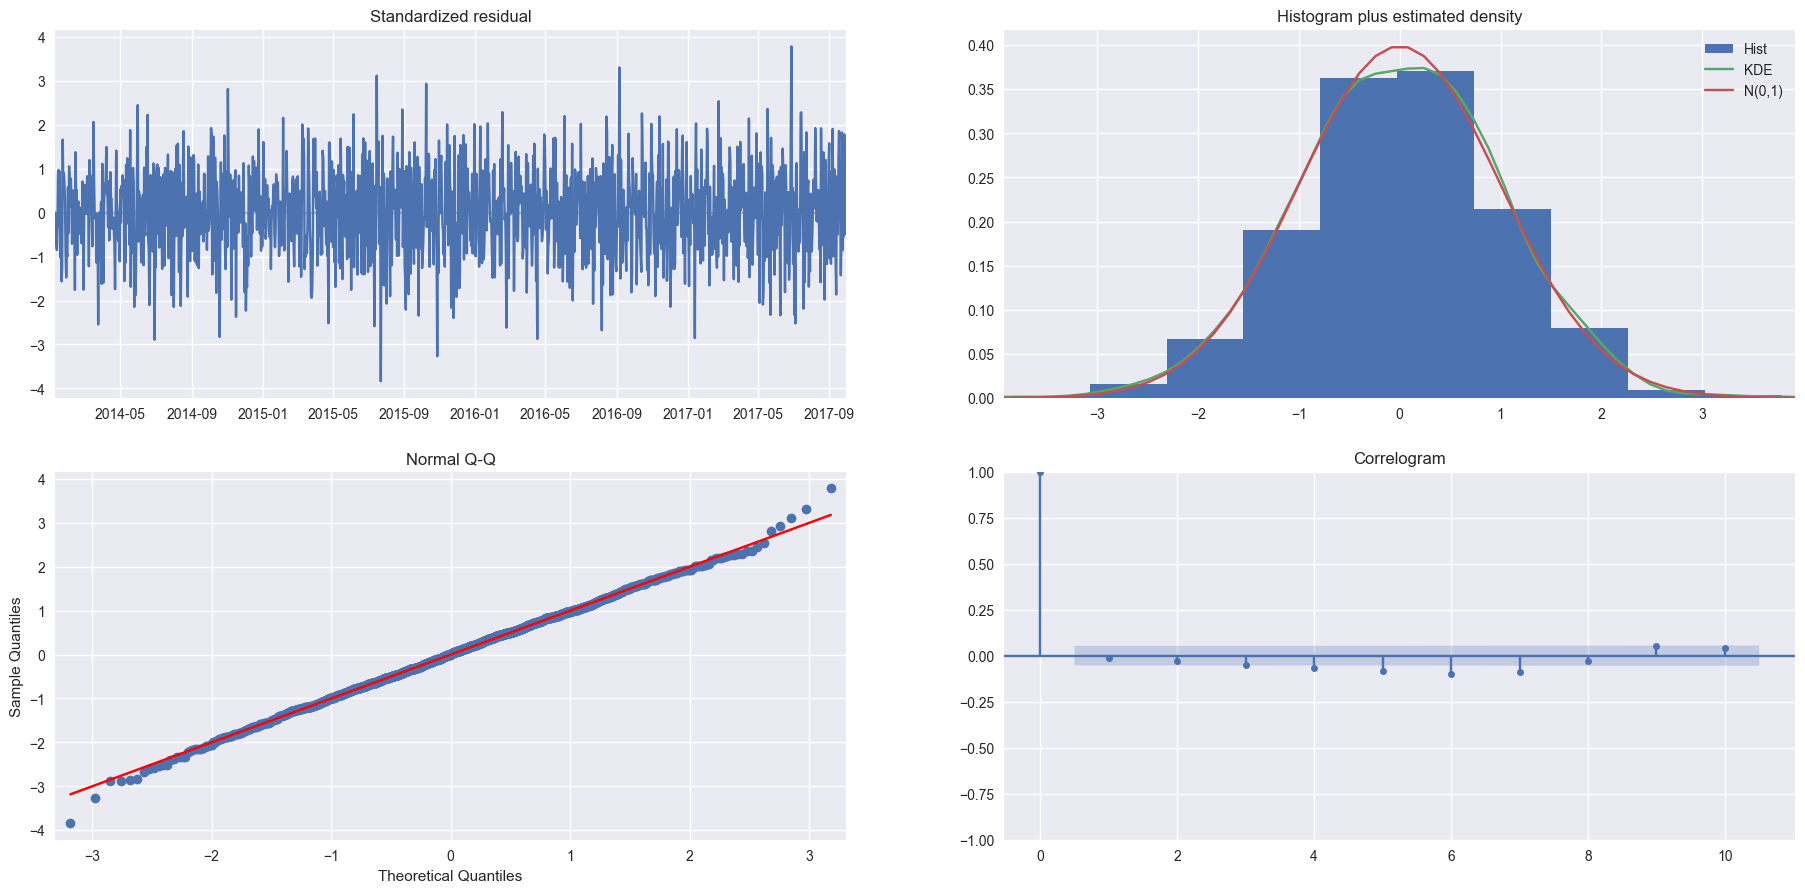

In [97]:
model_autoARIMA.plot_diagnostics()
plt.show()

TODO

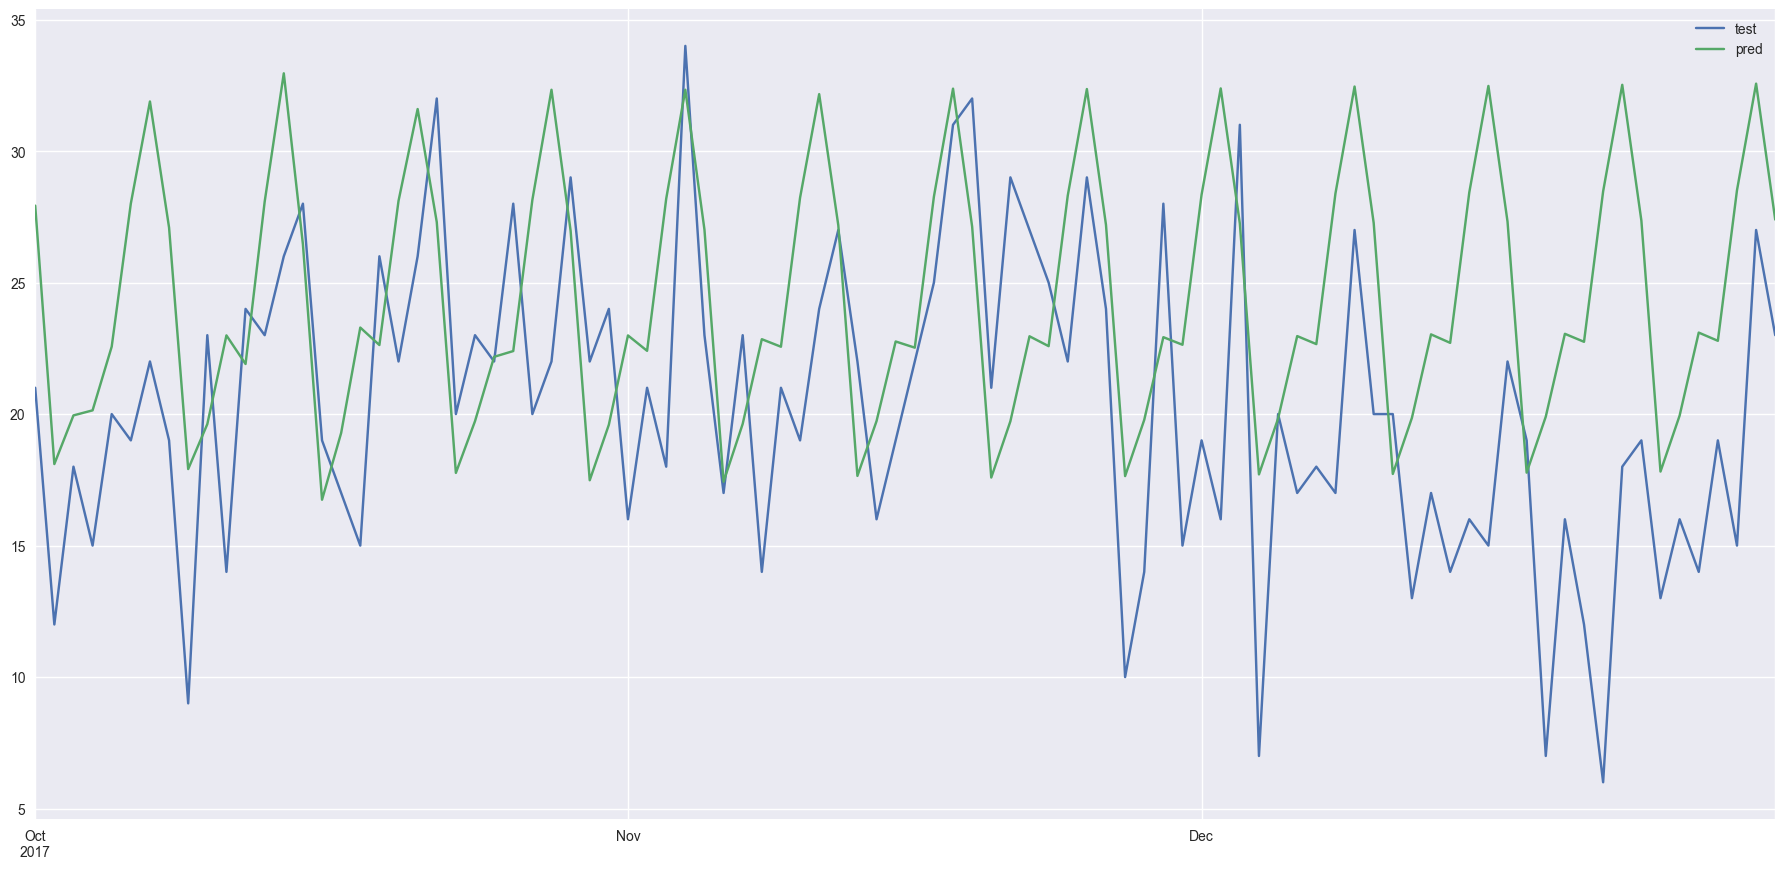

In [98]:
pred = model_autoARIMA.predict(x1.shape[0])

pd.DataFrame({'test':x1,'pred':pred}).plot();plt.show()

TODO